# Credit Card Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min


#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

## Import Data

In [2]:
df = pd.read_excel('infoclientebanca.xlsx')

## Explore Data

In [3]:
pd.set_option('max_rows', None) ## Configuracion para mostrar todas las filas sin restriccion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47871 entries, 0 to 47870
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   CLIENTE                                  47871 non-null  int64  
 1   grupo_de_cliente                         47871 non-null  object 
 2   Numero_de_transacciones                  47871 non-null  int64  
 3   promedio_por_transaccion                 47871 non-null  float64
 4   transaccion_minima                       47871 non-null  float64
 5   transaccion_maxima                       47871 non-null  float64
 6   desviacion_estandar_por_transaccion      47871 non-null  float64
 7   porcentaje_visa_nacional                 47871 non-null  float64
 8   porcentaje_visa_internacional            47871 non-null  float64
 9   porcentaje_mastercard_nacional           47871 non-null  float64
 10  porcentaje_mastercard_internacional      47871

### Verify numerical data distribution

In [4]:
df.columns

Index(['CLIENTE', 'grupo_de_cliente', 'Numero_de_transacciones',
       'promedio_por_transaccion', 'transaccion_minima', 'transaccion_maxima',
       'desviacion_estandar_por_transaccion', 'porcentaje_visa_nacional',
       'porcentaje_visa_internacional', 'porcentaje_mastercard_nacional',
       'porcentaje_mastercard_internacional',
       'Porcentaje_otrafranquicia_nacional',
       'porcentaje_otrafranquicia_internacional', 'porcentaje_nacional_total',
       'porcentaje_internacional_total', 'porcentaje_manana',
       'porcentaje_tarde', 'porcentaje_noche', 'porcDOMINGO', 'porcLUNES',
       'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES',
       'porcSABADO', 'Sitio_consumo_masfrecuente'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Numero_de_transacciones'}>,
        <AxesSubplot:title={'center':'promedio_por_transaccion'}>,
        <AxesSubplot:title={'center':'transaccion_minima'}>,
        <AxesSubplot:title={'center':'transaccion_maxima'}>,
        <AxesSubplot:title={'center':'porcentaje_visa_nacional'}>],
       [<AxesSubplot:title={'center':'porcentaje_visa_internacional'}>,
        <AxesSubplot:title={'center':'porcentaje_mastercard_nacional'}>,
        <AxesSubplot:title={'center':'porcentaje_mastercard_internacional'}>,
        <AxesSubplot:title={'center':'Porcentaje_otrafranquicia_nacional'}>,
        <AxesSubplot:title={'center':'porcentaje_otrafranquicia_internacional'}>],
       [<AxesSubplot:title={'center':'porcentaje_nacional_total'}>,
        <AxesSubplot:title={'center':'porcentaje_internacional_total'}>,
        <AxesSubplot:title={'center':'porcentaje_manana'}>,
        <AxesSubplot:title={'center':'porcentaje_tarde'}>,
        <AxesSubplot:title={'cente

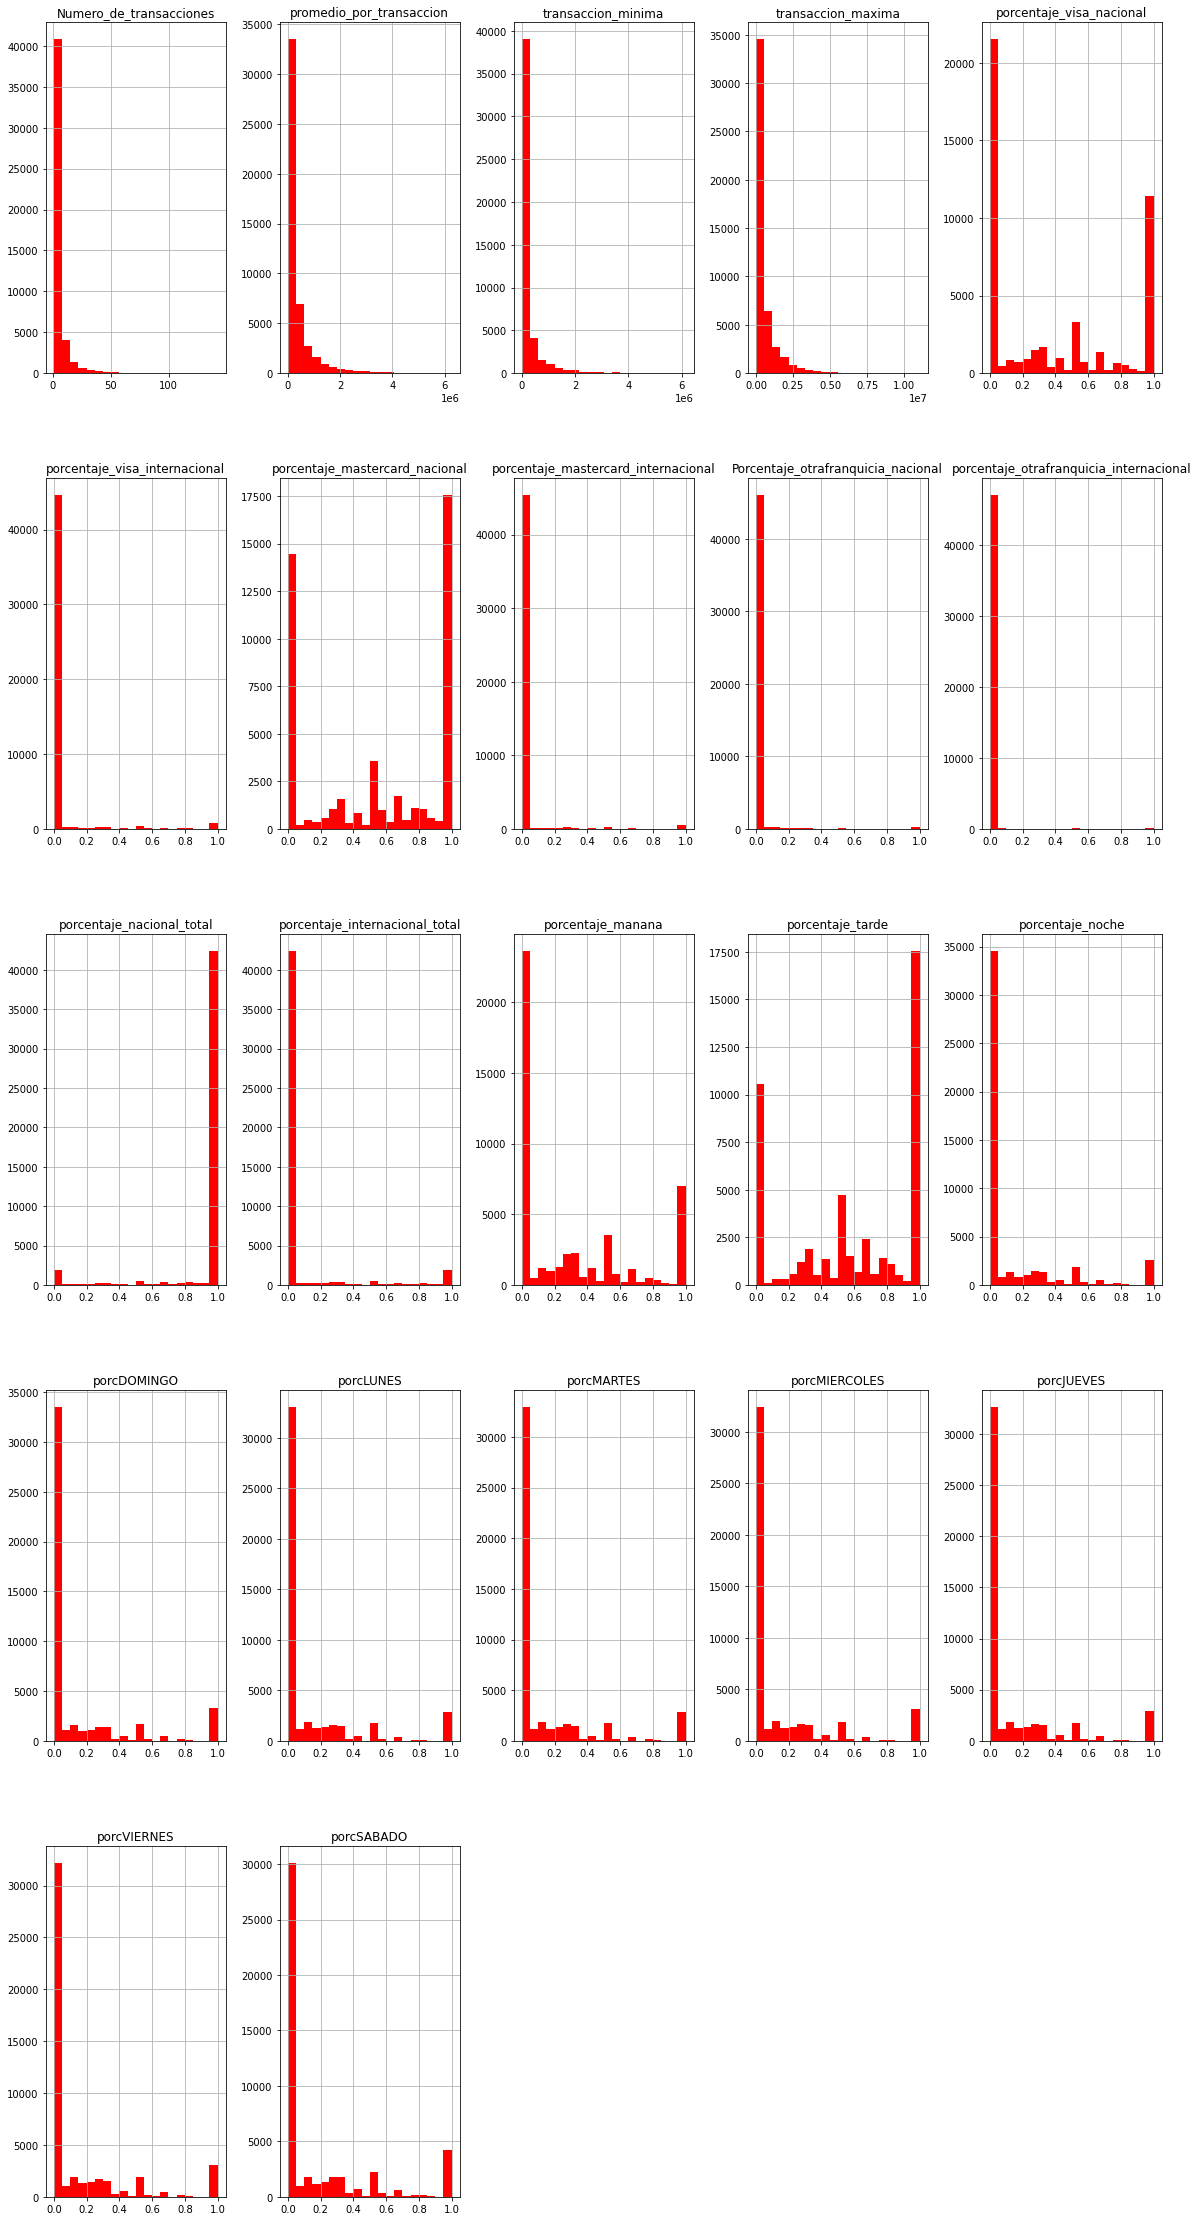

In [6]:
df[[ 'Numero_de_transacciones',
       'promedio_por_transaccion', 'transaccion_minima', 'transaccion_maxima',
       'porcentaje_visa_nacional',
       'porcentaje_visa_internacional', 'porcentaje_mastercard_nacional',
       'porcentaje_mastercard_internacional',
       'Porcentaje_otrafranquicia_nacional',
       'porcentaje_otrafranquicia_internacional', 'porcentaje_nacional_total',
       'porcentaje_internacional_total', 'porcentaje_manana',
       'porcentaje_tarde', 'porcentaje_noche', 'porcDOMINGO', 'porcLUNES',
       'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES',
       'porcSABADO']].hist(bins = 20, figsize=(20,40), color = 'r')

In [8]:
df[[ 'Numero_de_transacciones',
       'promedio_por_transaccion', 'transaccion_minima', 'transaccion_maxima',
       'porcentaje_visa_nacional',
       'porcentaje_visa_internacional', 'porcentaje_mastercard_nacional',
       'porcentaje_mastercard_internacional',
       'Porcentaje_otrafranquicia_nacional',
       'porcentaje_otrafranquicia_internacional', 'porcentaje_nacional_total',
       'porcentaje_internacional_total', 'porcentaje_manana',
       'porcentaje_tarde', 'porcentaje_noche', 'porcDOMINGO', 'porcLUNES',
       'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES',
       'porcSABADO']].describe().T

count           mean  \
Numero_de_transacciones                  47871.0       5.083161   
promedio_por_transaccion                 47871.0  371602.687994   
transaccion_minima                       47871.0  253089.817521   
transaccion_maxima                       47871.0  580731.855251   
porcentaje_visa_nacional                 47871.0       0.374875   
porcentaje_visa_internacional            47871.0       0.036459   
porcentaje_mastercard_nacional           47871.0       0.539322   
porcentaje_mastercard_internacional      47871.0       0.026549   
Porcentaje_otrafranquicia_nacional       47871.0       0.013885   
porcentaje_otrafranquicia_internacional  47871.0       0.008910   
porcentaje_nacional_total                47871.0       0.928082   
porcentaje_internacional_total           47871.0       0.071918   
porcentaje_manana                        47871.0       0.288049   
porcentaje_tarde                         47871.0       0.583742   
porcentaje_noche                         47871.0       0.128209   
porcDOMINGO                              47871.0       0.139326   
porcLUNES                                47871.0       0.131732   
porcMARTES                               47871.0       0.132743   
porcMIERCOLES                            47871.0       0.139473   
porcJUEVES                               47871.0       0.136221   
porcVIERNES                              47871.0       0.141524   
porcSABADO                               47871.0       0.178981   

                                                   std   min        25%  \
Numero_de_transacciones                       8.483558  1.00       1.00   
promedio_por_transaccion                 579821.741503  1.00   81000.00   
transaccion_minima                       518155.912390  0.04   30700.00   
transaccion_maxima                       885419.138315  1.00  114200.50   
porcentaje_visa_nacional                      0.413469  0.00       0.00   
porcentaje_visa_internacional                 0.160411  0.00       0.00   
porcentaje_mastercard_nacional                0.425019  0.00       0.00   
porcentaje_mastercard_internacional           0.135221  0.00       0.00   
Porcentaje_otrafranquicia_nacional            0.091212  0.00       0.00   
porcentaje_otrafranquicia_internacional       0.080315  0.00       0.00   
porcentaje_nacional_total                     0.229473  0.00       1.00   
porcentaje_internacional_total                0.229473  0.00       0.00   
porcentaje_manana                             0.363240  0.00       0.00   
porcentaje_tarde                              0.393189  0.00       0.25   
porcentaje_noche                              0.264462  0.00       0.00   
porcDOMINGO                                   0.280168  0.00       0.00   
porcLUNES                                     0.265330  0.00       0.00   
porcMARTES                                    0.265835  0.00       0.00   
porcMIERCOLES                                 0.272228  0.00       0.00   
porcJUEVES                                    0.268607  0.00       0.00   
porcVIERNES                                   0.273170  0.00       0.00   
porcSABADO                                    0.307786  0.00       0.00   

                                                   50%            75%  \
Numero_de_transacciones                       2.000000       5.000000   
promedio_por_transaccion                 167173.750000  383667.450000   
transaccion_minima                        80000.000000  217800.000000   
transaccion_maxima                       257933.000000  627401.000000   
porcentaje_visa_nacional                      0.200000       0.827586   
porcentaje_visa_internacional                 0.000000       0.000000   
porcentaje_mastercard_nacional                0.571429       1.000000   
porcentaje_mastercard_internacional           0.000000       0.000000   
Porcentaje_otrafranquicia_nacional            0.000000       0.000000   
porcentaje_otrafranquicia_internacional      

### Apply log transformation to data

In [7]:
df['Numero_de_transacciones_ln'] = np.log1p(df['Numero_de_transacciones'])
df['promedio_por_transaccion_ln'] = np.log1p(df['promedio_por_transaccion'])
df['transaccion_minima_ln'] = np.log1p(df['transaccion_minima'])
df['transaccion_maxima_ln'] = np.log1p(df['transaccion_maxima'])


In [8]:
df.columns

Index(['CLIENTE', 'grupo_de_cliente', 'Numero_de_transacciones',
       'promedio_por_transaccion', 'transaccion_minima', 'transaccion_maxima',
       'desviacion_estandar_por_transaccion', 'porcentaje_visa_nacional',
       'porcentaje_visa_internacional', 'porcentaje_mastercard_nacional',
       'porcentaje_mastercard_internacional',
       'Porcentaje_otrafranquicia_nacional',
       'porcentaje_otrafranquicia_internacional', 'porcentaje_nacional_total',
       'porcentaje_internacional_total', 'porcentaje_manana',
       'porcentaje_tarde', 'porcentaje_noche', 'porcDOMINGO', 'porcLUNES',
       'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES',
       'porcSABADO', 'Sitio_consumo_masfrecuente',
       'Numero_de_transacciones_ln', 'promedio_por_transaccion_ln',
       'transaccion_minima_ln', 'transaccion_maxima_ln'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Numero_de_transacciones'}>,
        <AxesSubplot:title={'center':'promedio_por_transaccion'}>,
        <AxesSubplot:title={'center':'transaccion_minima'}>,
        <AxesSubplot:title={'center':'transaccion_maxima'}>,
        <AxesSubplot:title={'center':'porcentaje_visa_nacional'}>],
       [<AxesSubplot:title={'center':'porcentaje_visa_internacional'}>,
        <AxesSubplot:title={'center':'porcentaje_mastercard_nacional'}>,
        <AxesSubplot:title={'center':'porcentaje_mastercard_internacional'}>,
        <AxesSubplot:title={'center':'Porcentaje_otrafranquicia_nacional'}>,
        <AxesSubplot:title={'center':'porcentaje_otrafranquicia_internacional'}>],
       [<AxesSubplot:title={'center':'porcentaje_nacional_total'}>,
        <AxesSubplot:title={'center':'porcentaje_internacional_total'}>,
        <AxesSubplot:title={'center':'porcentaje_manana'}>,
        <AxesSubplot:title={'center':'porcentaje_tarde'}>,
        <AxesSubplot:title={'cente

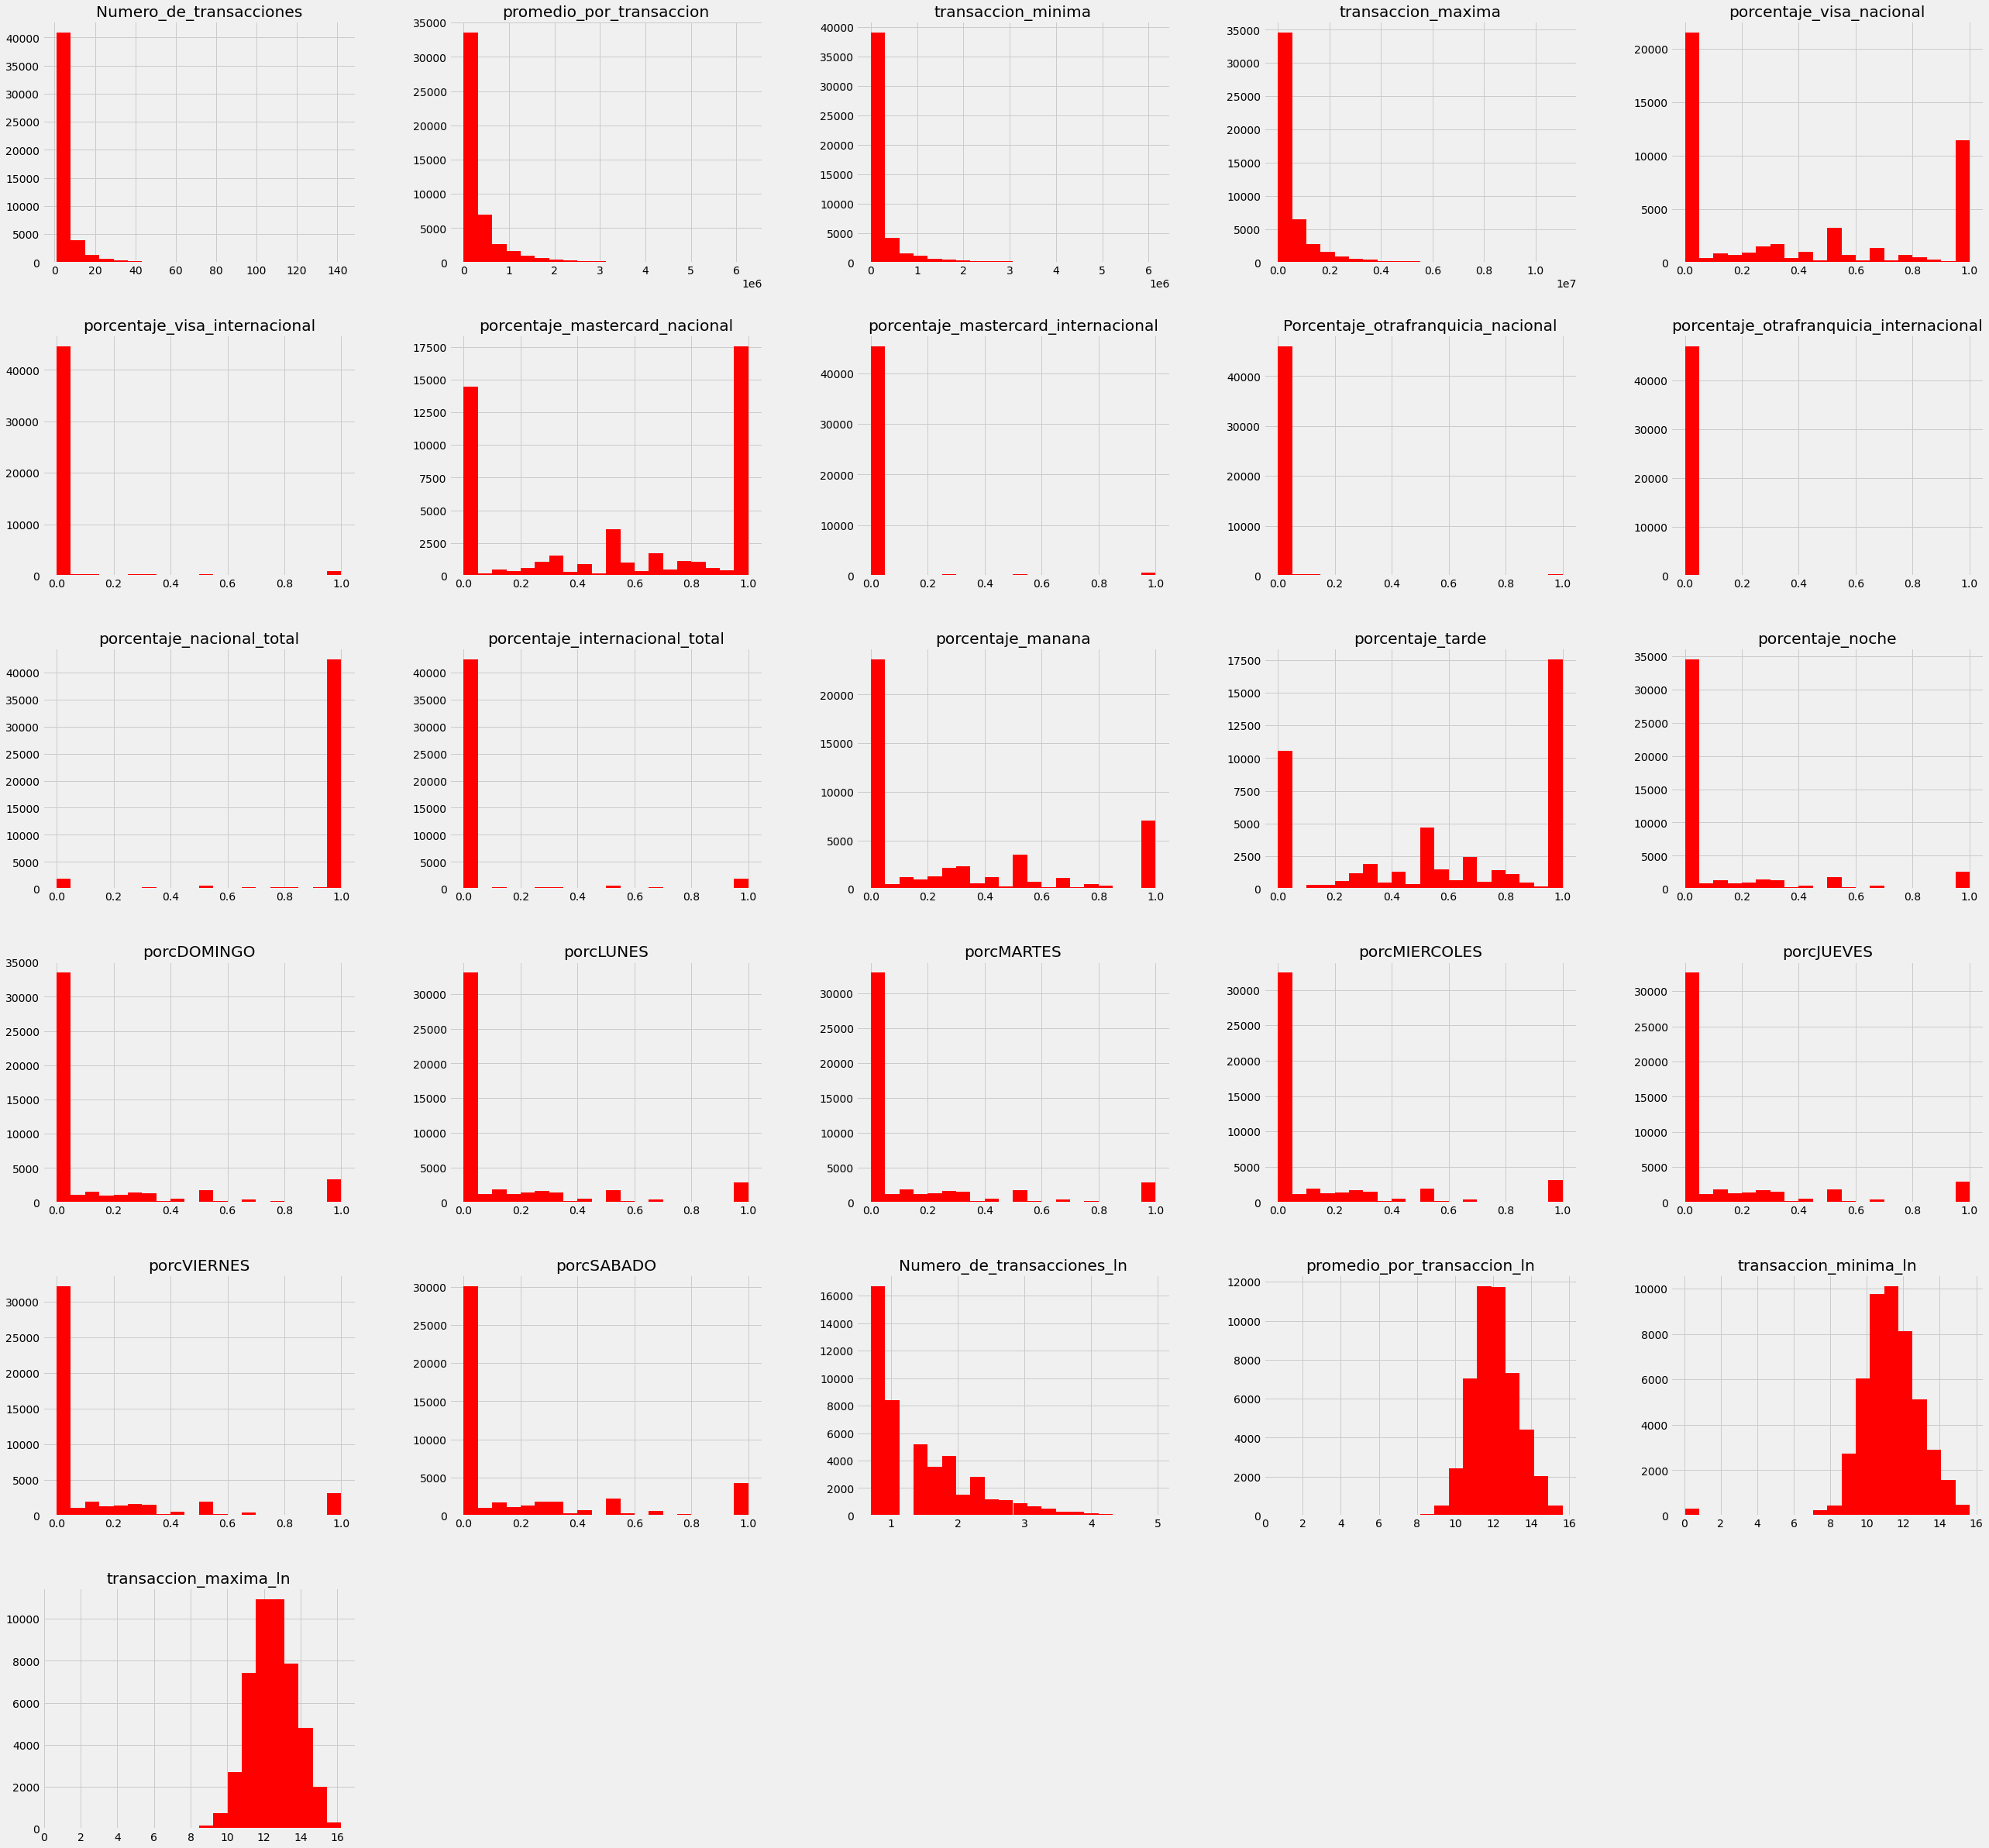

In [62]:
df[[ 'Numero_de_transacciones',
       'promedio_por_transaccion', 'transaccion_minima', 'transaccion_maxima',
       'porcentaje_visa_nacional',
       'porcentaje_visa_internacional', 'porcentaje_mastercard_nacional',
       'porcentaje_mastercard_internacional',
       'Porcentaje_otrafranquicia_nacional',
       'porcentaje_otrafranquicia_internacional', 'porcentaje_nacional_total',
       'porcentaje_internacional_total', 'porcentaje_manana',
       'porcentaje_tarde', 'porcentaje_noche', 'porcDOMINGO', 'porcLUNES',
       'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES',
       'porcSABADO', 'Numero_de_transacciones_ln', 'promedio_por_transaccion_ln',
       'transaccion_minima_ln', 'transaccion_maxima_ln']].hist(bins = 20, figsize=(40,40), color = 'r')

### Verify completeness of Data

In [9]:
df.isna().sum()

CLIENTE                                    0
grupo_de_cliente                           0
Numero_de_transacciones                    0
promedio_por_transaccion                   0
transaccion_minima                         0
transaccion_maxima                         0
desviacion_estandar_por_transaccion        0
porcentaje_visa_nacional                   0
porcentaje_visa_internacional              0
porcentaje_mastercard_nacional             0
porcentaje_mastercard_internacional        0
Porcentaje_otrafranquicia_nacional         0
porcentaje_otrafranquicia_internacional    0
porcentaje_nacional_total                  0
porcentaje_internacional_total             0
porcentaje_manana                          0
porcentaje_tarde                           0
porcentaje_noche                           0
porcDOMINGO                                0
porcLUNES                                  0
porcMARTES                                 0
porcMIERCOLES                              0
porcJUEVES

<AxesSubplot:>

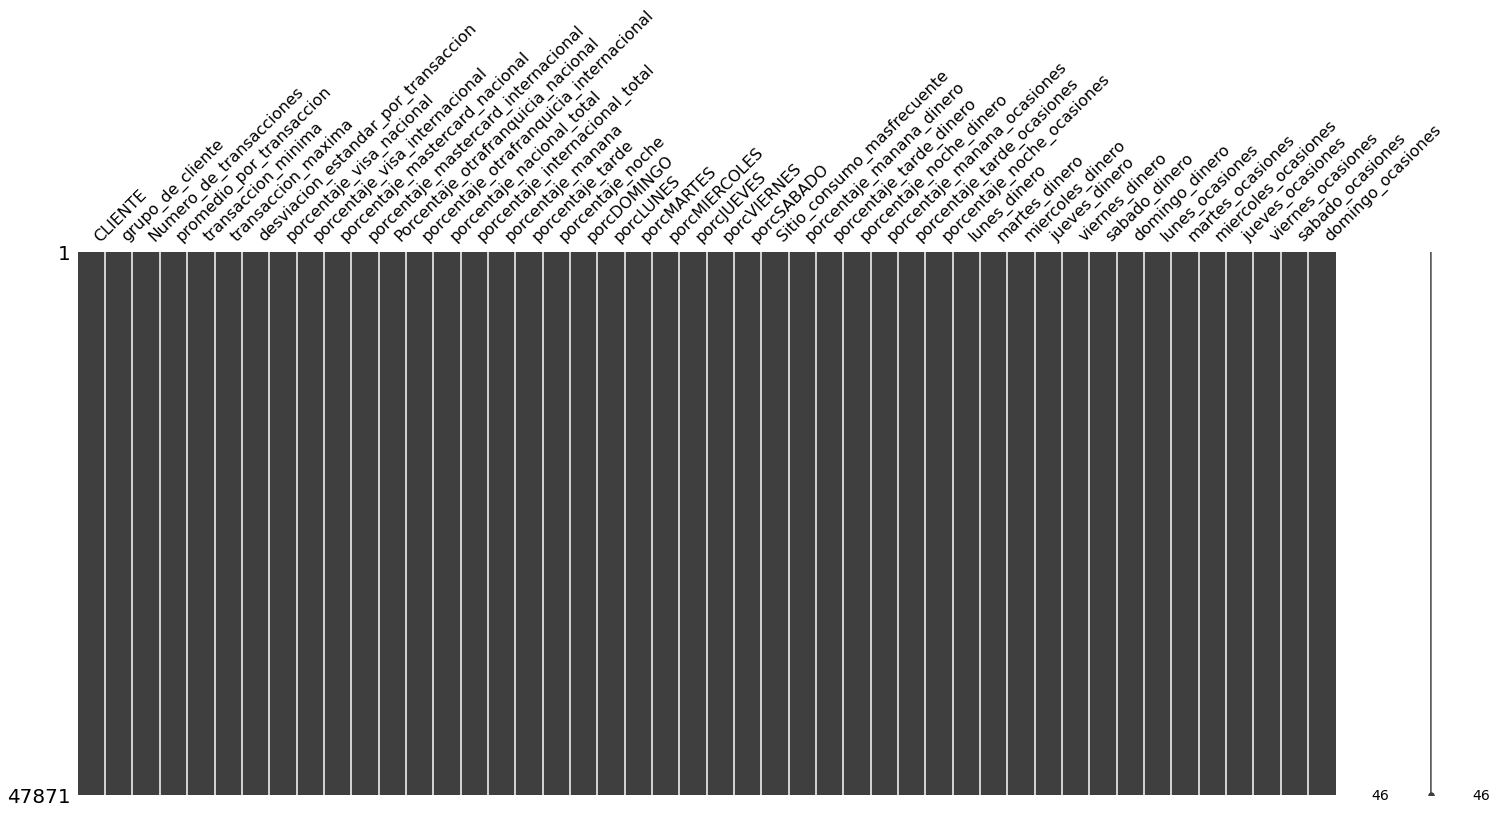

In [7]:
import missingno as msno

## identifica con una matriz las filas donde se presentan datos faltantes con color blanco para cada una de las columnas
msno.matrix(df)

<AxesSubplot:>

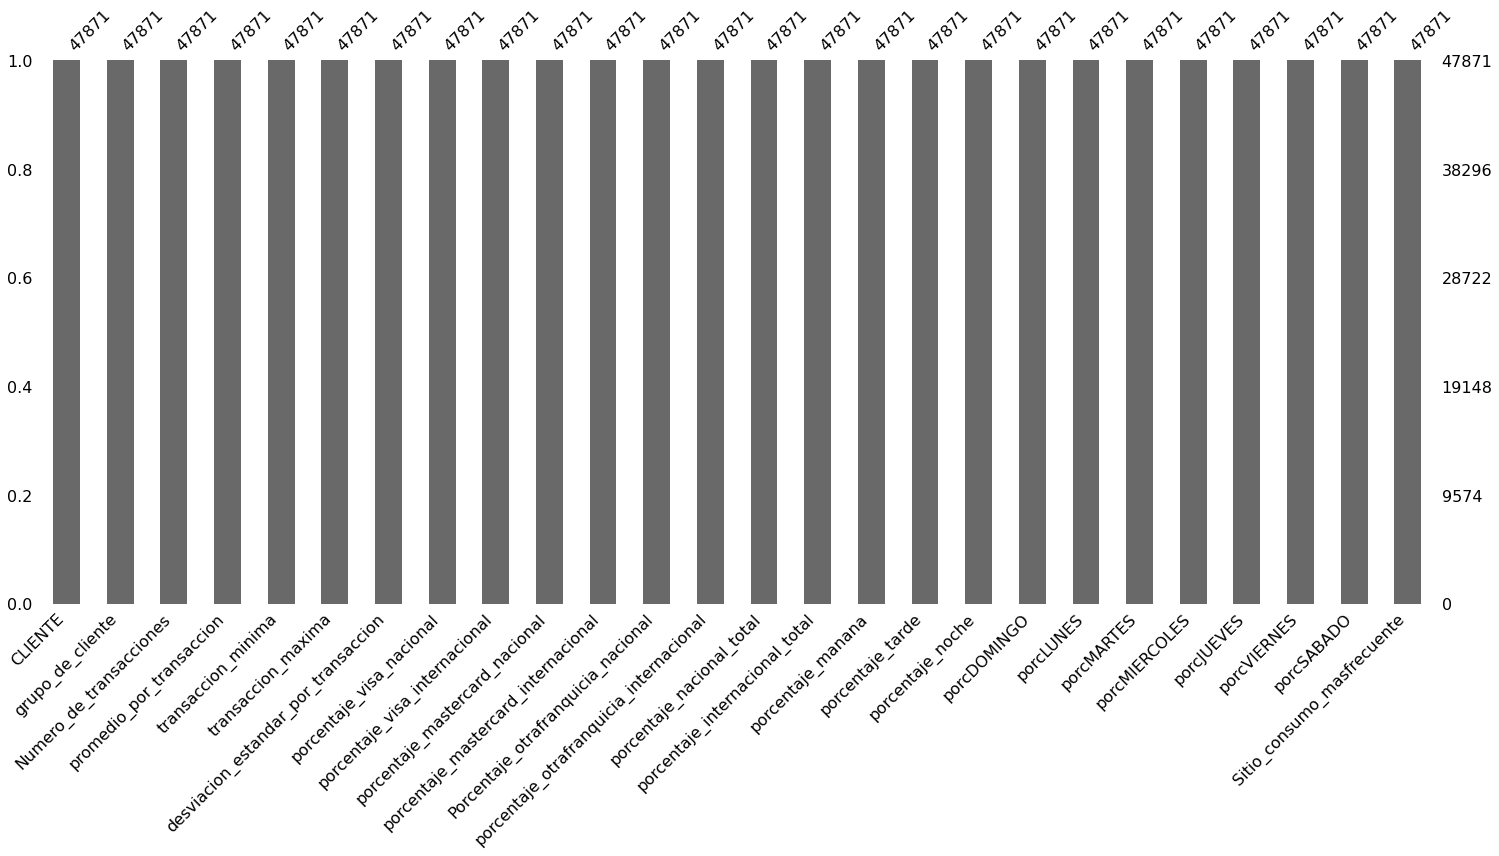

In [6]:
## Identifica con una barra negra la cantidad de registros existentes por columna
msno.bar(df)

C:\Users\jrose\.virtualenvs\datamining-YAMBdwSS\lib\site-packages\seaborn\matrix.py:301: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\jrose\.virtualenvs\datamining-YAMBdwSS\lib\site-packages\seaborn\matrix.py:301: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<AxesSubplot:>

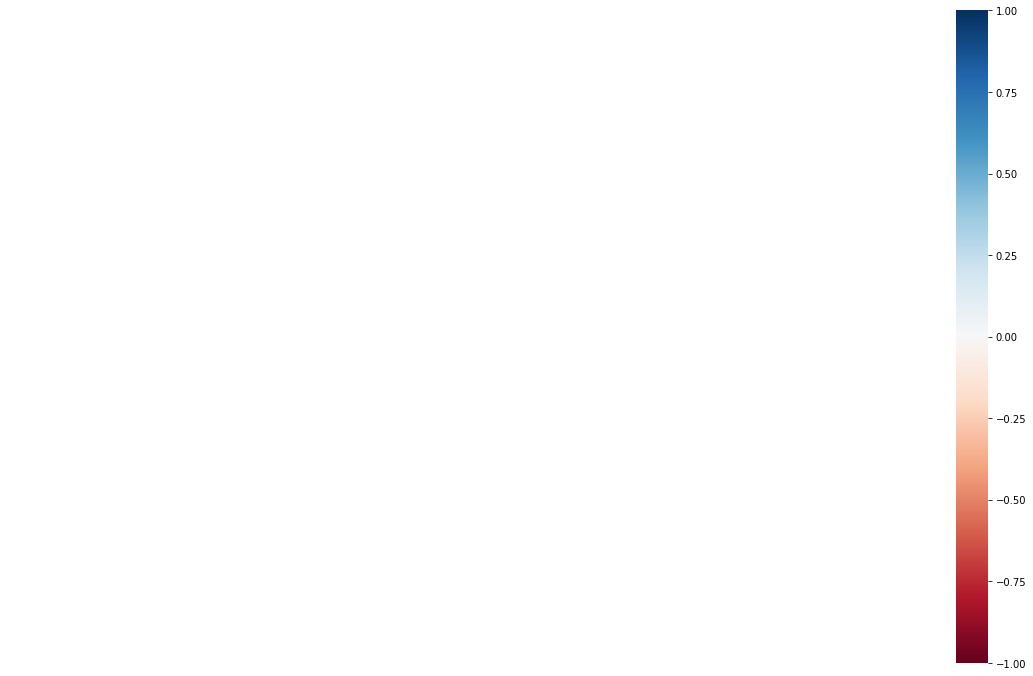

In [7]:
## Identifica la correlacion entre la existencia de valores nulos en las columnas del DF

msno.heatmap(df)

### Correlation

In [8]:
corr_df = df.corr(method='pearson')


<AxesSubplot:>

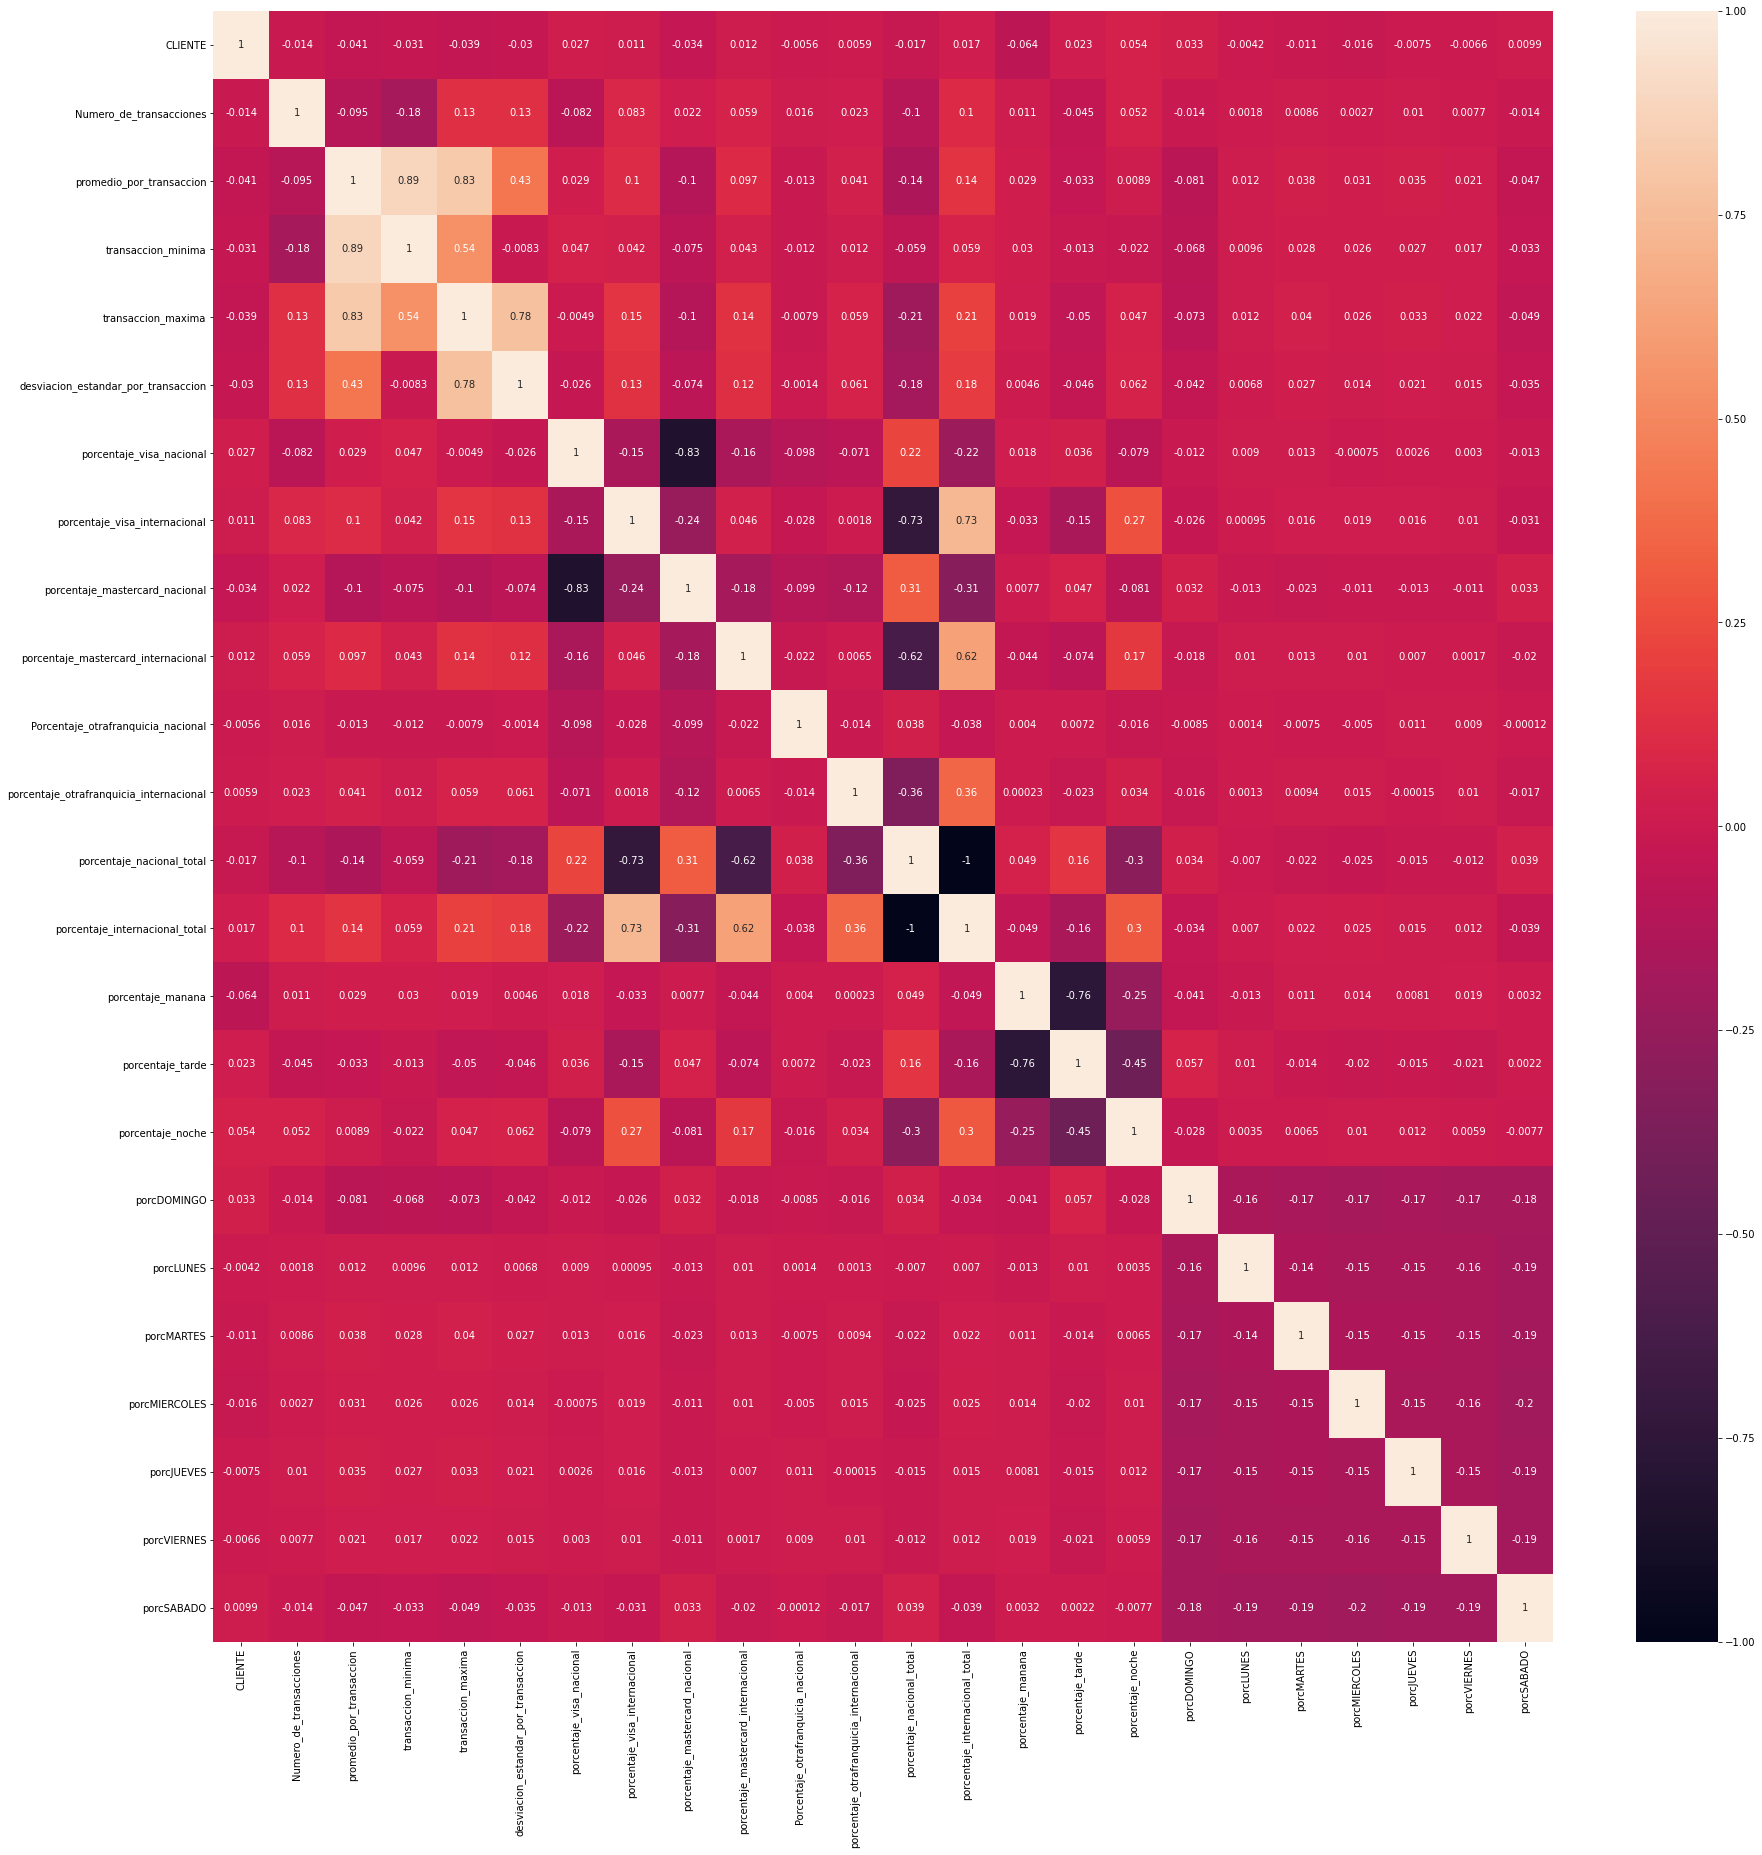

In [9]:
plt.figure(figsize=(30,30))
sns.heatmap(corr_df, annot=True)

## First Version

In [26]:
cols_modelo_1 = [ 'porcentaje_visa_nacional',
       'porcentaje_visa_internacional', 'porcentaje_mastercard_nacional',
       'porcentaje_mastercard_internacional',
       'Porcentaje_otrafranquicia_nacional',
       'porcentaje_otrafranquicia_internacional', 'porcentaje_nacional_total',
       'porcentaje_internacional_total', 'porcentaje_manana',
       'porcentaje_tarde', 'porcentaje_noche', 'porcDOMINGO', 'porcLUNES',
       'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES',
       'porcSABADO', 
       'porcentaje_visa_nacional_ln', 'Numero_de_transacciones_ln',
       'promedio_por_transaccion_ln', 'transaccion_minima_ln',
       'transaccion_maxima_ln', 'desviacion_estandar_por_transaccion_ln']

In [27]:
X = np.array(df[cols_modelo_1])

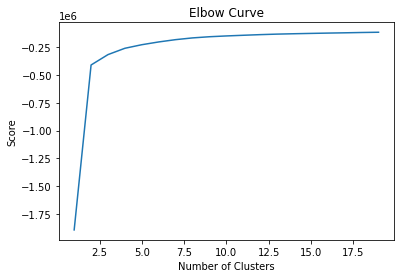

In [28]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [35]:
modelo_1 = KMeans(n_clusters=3).fit(X)
# Predicting the clusters
labels = modelo_1.predict(X)

In [36]:
centroids = modelo_1.cluster_centers_
print(centroids)

[[3.49820063e-01 2.91552827e-02 5.78916625e-01 1.97047957e-02
  1.59572258e-02 6.44600816e-03 9.44693913e-01 5.53060865e-02
  2.87054858e-01 5.81301990e-01 1.31643152e-01 1.52561724e-01
  1.31863650e-01 1.28455478e-01 1.32431458e-01 1.26672868e-01
  1.39440296e-01 1.88574527e-01 1.82985889e+00 1.82985889e+00
  1.12996642e+01 1.01579197e+01 1.18766394e+01 1.05047710e+01]
 [4.16657094e-01 2.23434808e-02 5.27958070e-01 1.62837450e-02
  1.16456060e-02 5.11200460e-03 9.56260770e-01 4.37392303e-02
  2.84496868e-01 6.07608244e-01 1.07894888e-01 1.42304231e-01
  1.30404442e-01 1.28768068e-01 1.41197295e-01 1.35366766e-01
  1.41234494e-01 1.80724704e-01 7.13464387e-01 7.13464387e-01
  1.22061041e+01 1.22061015e+01 1.22061064e+01 8.77517588e-03]
 [3.52477560e-01 6.39351129e-02 5.04025887e-01 4.84646629e-02
  1.41631049e-02 1.69336718e-02 8.70666552e-01 1.29333448e-01
  2.93899070e-01 5.55959815e-01 1.50141115e-01 1.18763074e-01
  1.33283819e-01 1.43295562e-01 1.46134525e-01 1.49380739e-01
  1.44

In [37]:
centroids_df = pd.DataFrame(centroids,columns=cols_modelo_1).T

In [38]:
centroids_df

0          1          2
porcentaje_visa_nacional                  0.349820   0.416657   0.352478
porcentaje_visa_internacional             0.029155   0.022343   0.063935
porcentaje_mastercard_nacional            0.578917   0.527958   0.504026
porcentaje_mastercard_internacional       0.019705   0.016284   0.048465
Porcentaje_otrafranquicia_nacional        0.015957   0.011646   0.014163
porcentaje_otrafranquicia_internacional   0.006446   0.005112   0.016934
porcentaje_nacional_total                 0.944694   0.956261   0.870667
porcentaje_internacional_total            0.055306   0.043739   0.129333
porcentaje_manana                         0.287055   0.284497   0.293899
porcentaje_tarde                          0.581302   0.607608   0.555960
porcentaje_noche                          0.131643   0.107895   0.150141
porcDOMINGO                               0.152562   0.142304   0.118763
porcLUNES                                 0.131864   0.130404   0.133284
porcMARTES                                0.128455   0.128768   0.143296
porcMIERCOLES                             0.132431   0.141197   0.146135
porcJUEVES                                0.126673   0.135367   0.149381
porcVIERNES                               0.139440   0.141234   0.144530
porcSABADO                                0.188575   0.180725   0.164612
porcentaje_visa_nacional_ln               1.829859   0.713464   1.783009
Numero_de_transacciones_ln                1.829859   0.713464   1.783009
promedio_por_transaccion_ln              11.299664  12.206104  13.006434
transaccion_minima_ln                    10.157920  12.206101  11.653059
transaccion_maxima_ln                    11.876639  12.206106  13.697101
desviacion_estandar_por_transaccion_ln   10.504771   0.008775  12.495619

## Second Version

In [87]:
cols_modelo_2 = [ 'porcentaje_visa_nacional',
       'porcentaje_visa_internacional', 'porcentaje_mastercard_nacional',
       'porcentaje_mastercard_internacional',
       'Porcentaje_otrafranquicia_nacional',
       'porcentaje_otrafranquicia_internacional', 'porcentaje_nacional_total',
       'porcentaje_internacional_total', 'porcentaje_manana',
       'porcentaje_tarde', 'porcentaje_noche', 'porcDOMINGO', 'porcLUNES',
       'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES',
       'porcSABADO']

In [88]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

### Silhouette score

In [89]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df[cols_modelo_2])
    score = silhouette_score(df[cols_modelo_2], kmeans.labels_)
    silhouette_coefficients.append(score)

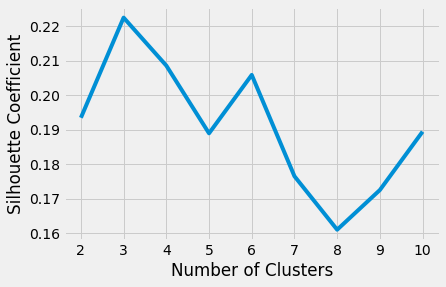

In [90]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
modelo_2 = KMeans(n_clusters=2).fit(X)

## Third Version

In [52]:
cols_modelo_3 = [ 'porcentaje_manana',
       'porcentaje_tarde', 'porcentaje_noche', 'porcDOMINGO', 'porcLUNES',
       'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES',
       'porcSABADO']

In [53]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df[cols_modelo_3])
    score = silhouette_score(df[cols_modelo_3], kmeans.labels_)
    silhouette_coefficients.append(score)

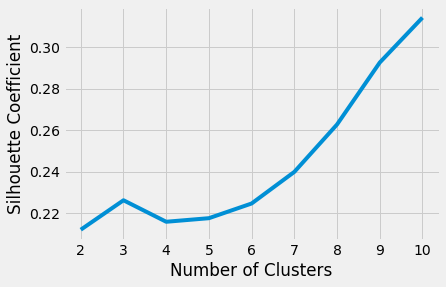

In [54]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## Fourth Version

In [91]:
cols_modelo_4 = ['Numero_de_transacciones',
       'promedio_por_transaccion','porcentaje_manana',
        'porcentaje_noche', 'porcDOMINGO', 'porcLUNES',
       'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES',
       'porcSABADO']

In [92]:
scaler =StandardScaler()
scaled_features = scaler.fit_transform(df[cols_modelo_4])

In [93]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

In [94]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

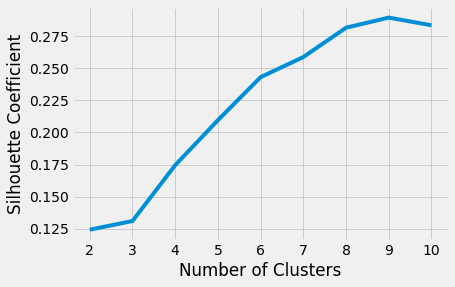

In [95]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## Fifth Version

### Transformation of percentage values to money and number of occasions

In [4]:
df.columns

Index(['CLIENTE', 'grupo_de_cliente', 'Numero_de_transacciones',
       'promedio_por_transaccion', 'transaccion_minima', 'transaccion_maxima',
       'desviacion_estandar_por_transaccion', 'porcentaje_visa_nacional',
       'porcentaje_visa_internacional', 'porcentaje_mastercard_nacional',
       'porcentaje_mastercard_internacional',
       'Porcentaje_otrafranquicia_nacional',
       'porcentaje_otrafranquicia_internacional', 'porcentaje_nacional_total',
       'porcentaje_internacional_total', 'porcentaje_manana',
       'porcentaje_tarde', 'porcentaje_noche', 'porcDOMINGO', 'porcLUNES',
       'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES',
       'porcSABADO', 'Sitio_consumo_masfrecuente'],
      dtype='object')

In [3]:
df['porcentaje_visa_nacional_dinero'] = df['promedio_por_transaccion']*df['porcentaje_visa_nacional']*df['Numero_de_transacciones']
df['porcentaje_mastercard_nacional_dinero'] = df['promedio_por_transaccion']*df['porcentaje_mastercard_nacional']*df['Numero_de_transacciones']

df['porcentaje_visa_nacional_ocasiones'] = df['porcentaje_visa_nacional']*df['Numero_de_transacciones']
df['porcentaje_mastercard_nacional_ocasiones'] = df['porcentaje_mastercard_nacional']*df['Numero_de_transacciones']



df['porcentaje_manana_dinero'] = df['promedio_por_transaccion']*df['porcentaje_manana']*df['Numero_de_transacciones']
df['porcentaje_tarde_dinero'] = df['promedio_por_transaccion']*df['porcentaje_tarde']*df['Numero_de_transacciones']
df['porcentaje_noche_dinero'] = df['promedio_por_transaccion']*df['porcentaje_noche']*df['Numero_de_transacciones']

df['porcentaje_manana_ocasiones'] = df['porcentaje_manana']*df['Numero_de_transacciones']
df['porcentaje_tarde_ocasiones'] = df['porcentaje_tarde']*df['Numero_de_transacciones']
df['porcentaje_noche_ocasiones'] = df['porcentaje_noche']*df['Numero_de_transacciones']

df['lunes_dinero'] = df['promedio_por_transaccion']*df['porcLUNES']*df['Numero_de_transacciones']
df['martes_dinero'] = df['promedio_por_transaccion']*df['porcMARTES']*df['Numero_de_transacciones']
df['miercoles_dinero'] = df['promedio_por_transaccion']*df['porcMIERCOLES']*df['Numero_de_transacciones']
df['jueves_dinero'] = df['promedio_por_transaccion']*df['porcJUEVES']*df['Numero_de_transacciones']
df['viernes_dinero'] = df['promedio_por_transaccion']*df['porcVIERNES']*df['Numero_de_transacciones']
df['sabado_dinero'] = df['promedio_por_transaccion']*df['porcSABADO']*df['Numero_de_transacciones']
df['domingo_dinero'] = df['promedio_por_transaccion']*df['porcDOMINGO']*df['Numero_de_transacciones']

df['lunes_ocasiones'] = df['porcLUNES']*df['Numero_de_transacciones']
df['martes_ocasiones'] = df['porcMARTES']*df['Numero_de_transacciones']
df['miercoles_ocasiones'] = df['porcMIERCOLES']*df['Numero_de_transacciones']
df['jueves_ocasiones'] = df['porcJUEVES']*df['Numero_de_transacciones']
df['viernes_ocasiones'] = df['porcVIERNES']*df['Numero_de_transacciones']
df['sabado_ocasiones'] = df['porcSABADO']*df['Numero_de_transacciones']
df['domingo_ocasiones'] = df['porcDOMINGO']*df['Numero_de_transacciones']



In [6]:
df.columns

Index(['CLIENTE', 'grupo_de_cliente', 'Numero_de_transacciones',
       'promedio_por_transaccion', 'transaccion_minima', 'transaccion_maxima',
       'desviacion_estandar_por_transaccion', 'porcentaje_visa_nacional',
       'porcentaje_visa_internacional', 'porcentaje_mastercard_nacional',
       'porcentaje_mastercard_internacional',
       'Porcentaje_otrafranquicia_nacional',
       'porcentaje_otrafranquicia_internacional', 'porcentaje_nacional_total',
       'porcentaje_internacional_total', 'porcentaje_manana',
       'porcentaje_tarde', 'porcentaje_noche', 'porcDOMINGO', 'porcLUNES',
       'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES',
       'porcSABADO', 'Sitio_consumo_masfrecuente',
       'porcentaje_visa_nacional_dinero',
       'porcentaje_mastercard_nacional_dinero',
       'porcentaje_visa_nacional_ocasiones',
       'porcentaje_mastercard_nacional_ocasiones', 'porcentaje_manana_dinero',
       'porcentaje_tarde_dinero', 'porcentaje_noche_dinero',
       '

In [4]:
hist_col=[ 'porcentaje_visa_nacional_dinero', 'porcentaje_mastercard_nacional_dinero',
       'porcentaje_visa_nacional_ocasiones', 'porcentaje_mastercard_nacional_ocasiones', 
       'Numero_de_transacciones', 'promedio_por_transaccion', 'transaccion_minima', 'transaccion_maxima', 
       'porcentaje_manana_dinero', 'porcentaje_tarde_dinero', 'porcentaje_noche_dinero',
       'porcentaje_manana_ocasiones', 'porcentaje_tarde_ocasiones', 'porcentaje_noche_ocasiones',
       'lunes_dinero', 'martes_dinero', 'miercoles_dinero', 'jueves_dinero', 'viernes_dinero', 'sabado_dinero', 'domingo_dinero', 
       'lunes_ocasiones', 'martes_ocasiones', 'miercoles_ocasiones', 'jueves_ocasiones', 'viernes_ocasiones', 'sabado_ocasiones', 'domingo_ocasiones', 
       ]
       

### Histogram of the new columns transformed from percentages

array([[<AxesSubplot:title={'center':'porcentaje_visa_nacional_dinero'}>,
        <AxesSubplot:title={'center':'porcentaje_mastercard_nacional_dinero'}>,
        <AxesSubplot:title={'center':'porcentaje_visa_nacional_ocasiones'}>,
        <AxesSubplot:title={'center':'porcentaje_mastercard_nacional_ocasiones'}>,
        <AxesSubplot:title={'center':'Numero_de_transacciones'}>],
       [<AxesSubplot:title={'center':'promedio_por_transaccion'}>,
        <AxesSubplot:title={'center':'transaccion_minima'}>,
        <AxesSubplot:title={'center':'transaccion_maxima'}>,
        <AxesSubplot:title={'center':'porcentaje_manana_dinero'}>,
        <AxesSubplot:title={'center':'porcentaje_tarde_dinero'}>],
       [<AxesSubplot:title={'center':'porcentaje_noche_dinero'}>,
        <AxesSubplot:title={'center':'porcentaje_manana_ocasiones'}>,
        <AxesSubplot:title={'center':'porcentaje_tarde_ocasiones'}>,
        <AxesSubplot:title={'center':'porcentaje_noche_ocasiones'}>,
        <AxesSubplot:t

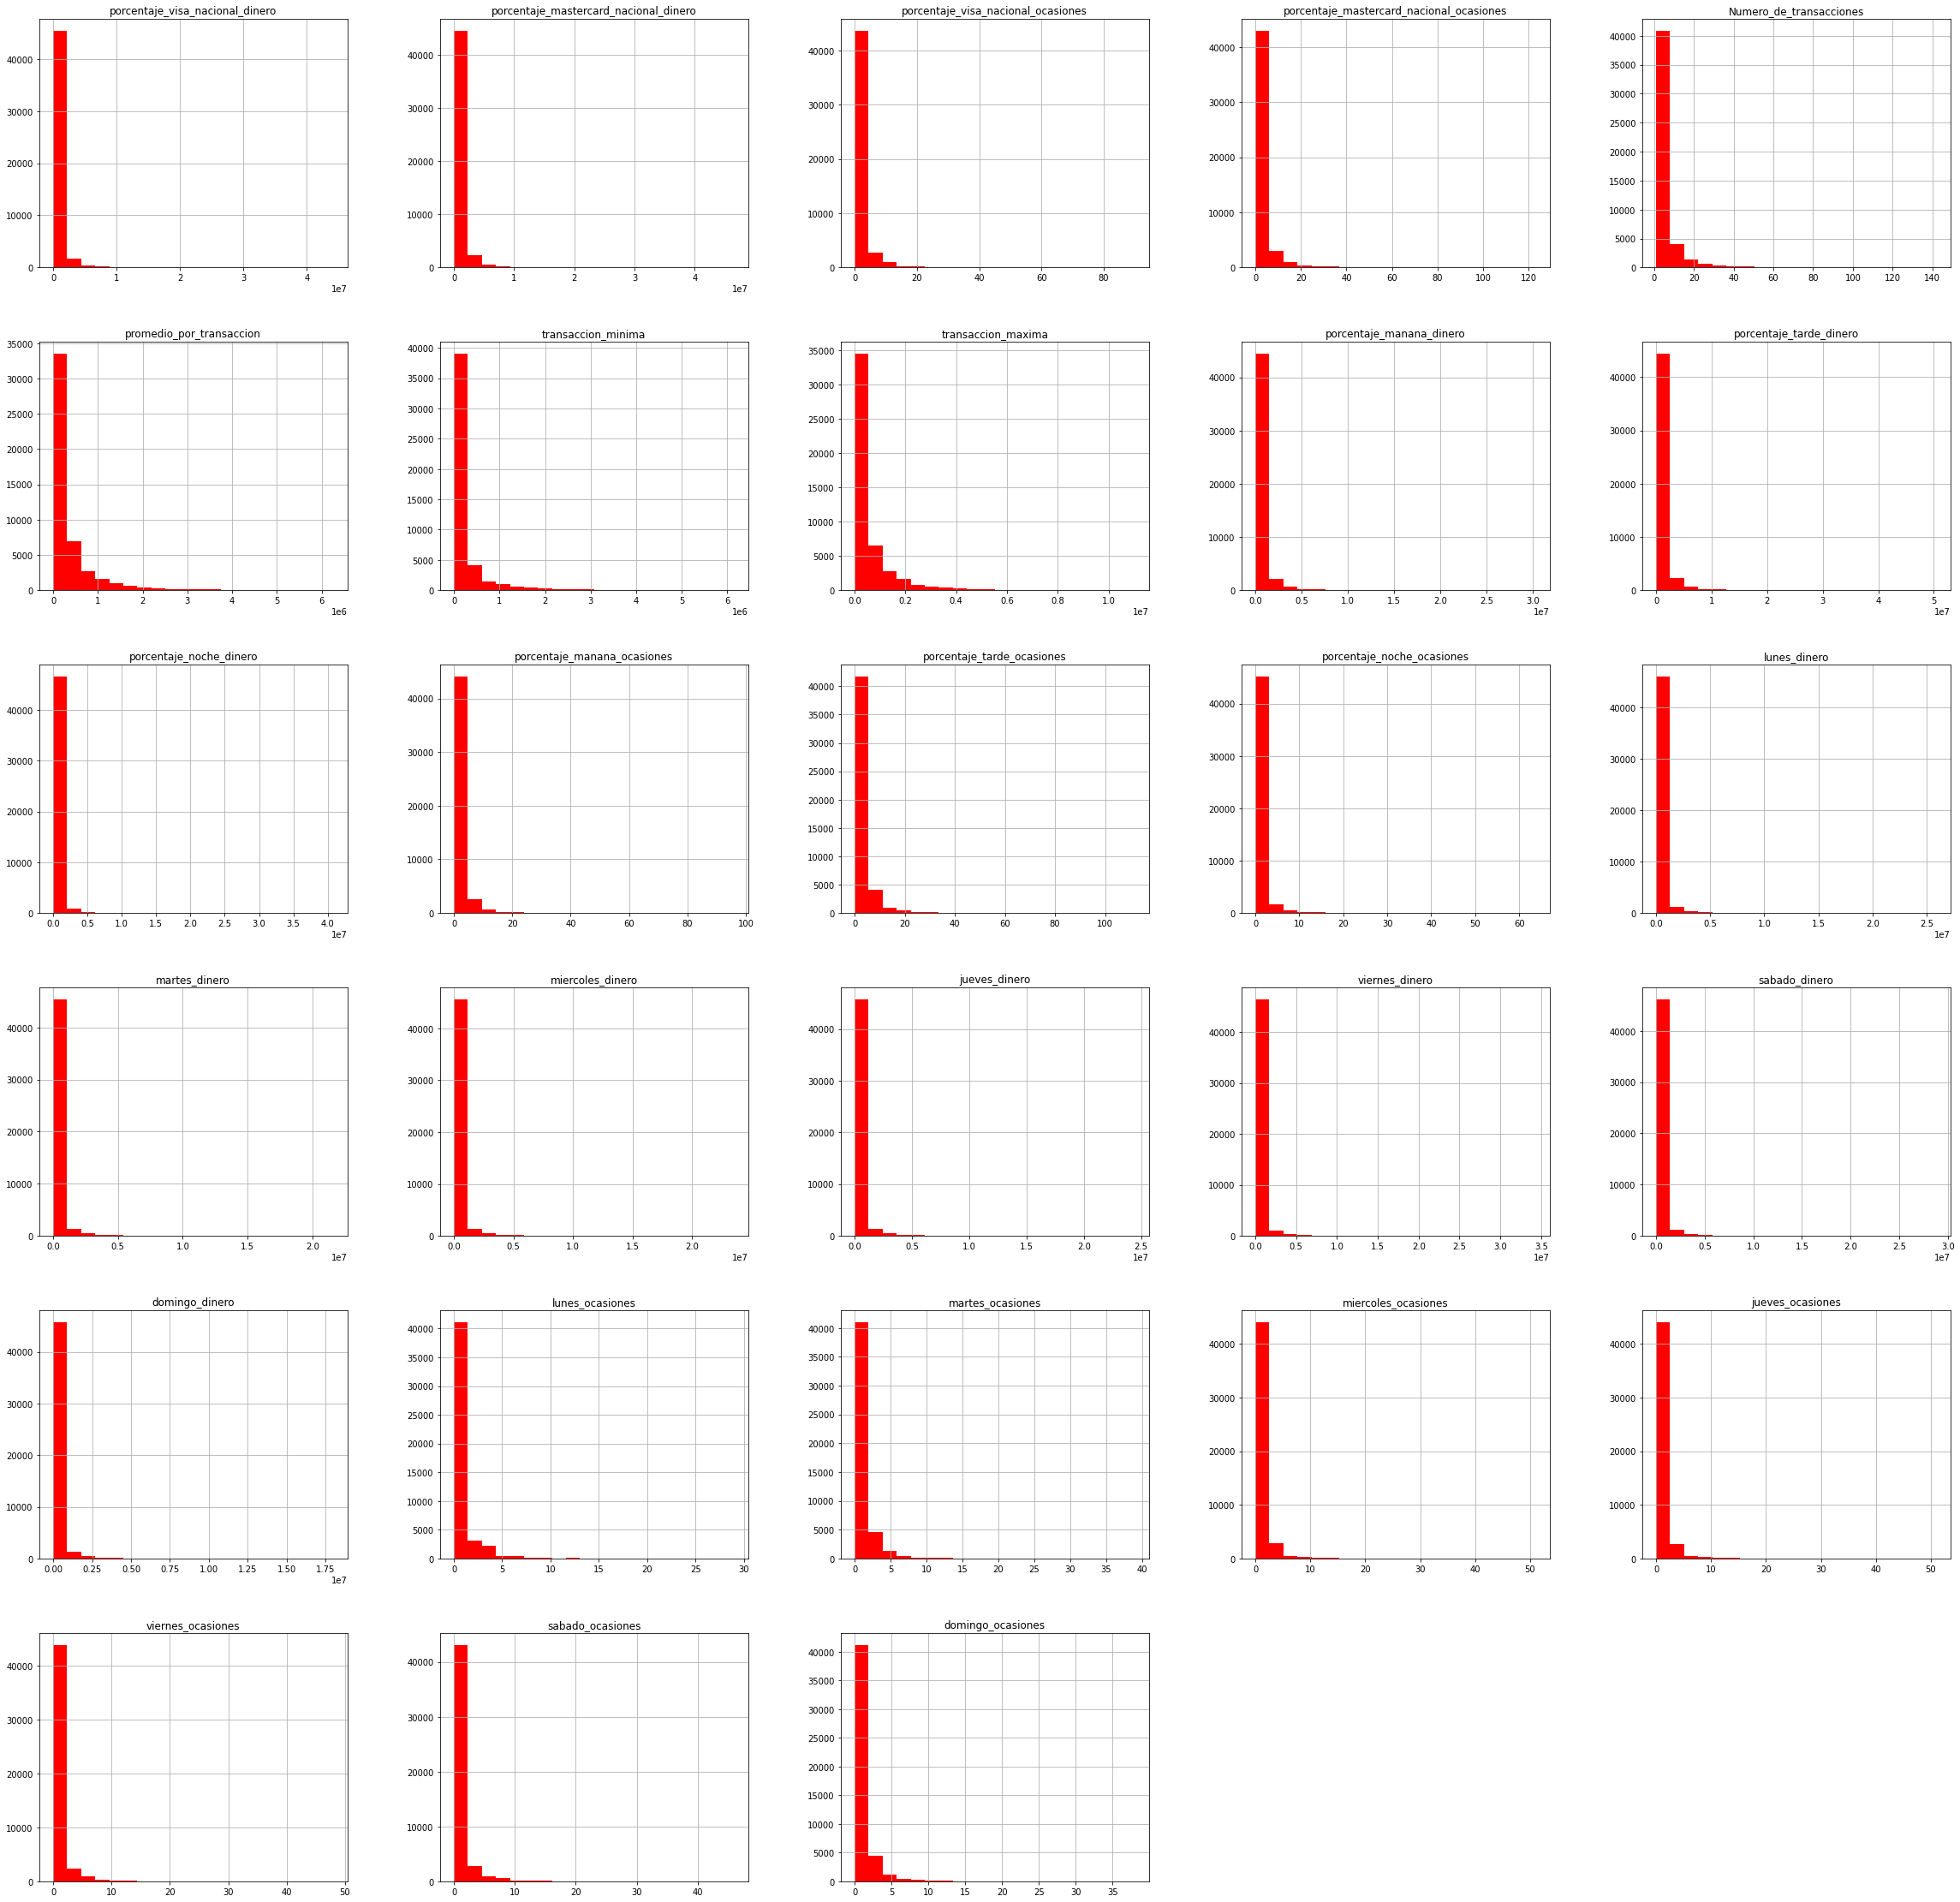

In [8]:
df[hist_col].hist(bins = 20, figsize=(40,40), color = 'r')

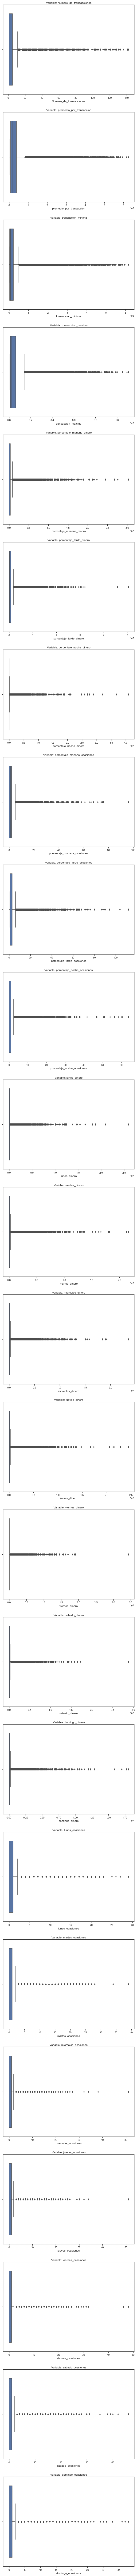

In [65]:
rows_sz= len(hist_col)
columns_sz=1
fig, axes = plt.subplots(rows_sz,columns_sz,figsize=(10,200))

for idx,column_plot in enumerate(hist_col): 

    sns.boxplot( ax=axes[idx],
    data=df,
    x=column_plot,)
    #id=idx
    #print(idx)
    axes[idx].set_title('Variable: {}'.format(column_plot))



### LN transformation 

In [5]:
df['Numero_de_transacciones_ln'] = np.log1p(df['Numero_de_transacciones'])
df['promedio_por_transaccion_ln'] = np.log1p(df['promedio_por_transaccion'])
df['transaccion_minima_ln'] = np.log1p(df['transaccion_minima'])
df['transaccion_maxima_ln'] = np.log1p(df['transaccion_maxima'])

df['lunes_dinero_ln'] =  np.log1p(df['lunes_dinero'])
df['martes_dinero_ln'] =  np.log1p(df['martes_dinero'])
df['miercoles_dinero_ln'] =  np.log1p(df['miercoles_dinero'])
df['jueves_dinero_ln'] =  np.log1p(df['jueves_dinero'])
df['viernes_dinero_ln'] =  np.log1p(df['viernes_dinero'])
df['sabado_dinero_ln'] =  np.log1p(df['sabado_dinero'])
df['domingo_dinero_ln'] =  np.log1p(df['domingo_dinero'])

df['lunes_ocasiones_ln'] =  np.log1p(df['lunes_ocasiones'])
df['martes_ocasiones_ln'] =  np.log1p(df['martes_ocasiones'])
df['miercoles_ocasiones_ln'] =  np.log1p(df['miercoles_ocasiones'])
df['jueves_ocasiones_ln'] =  np.log1p(df['jueves_ocasiones'])
df['viernes_ocasiones_ln'] =  np.log1p(df['viernes_ocasiones'])
df['sabado_ocasiones_ln'] =  np.log1p(df['sabado_ocasiones'])
df['domingo_ocasiones_ln'] =  np.log1p(df['domingo_ocasiones'])

df['porcentaje_manana_dinero_ln'] =  np.log1p(df['porcentaje_manana_dinero'])
df['porcentaje_tarde_dinero_ln'] =  np.log1p(df['porcentaje_tarde_dinero'])
df['porcentaje_noche_dinero_ln'] =  np.log1p(df['porcentaje_noche_dinero'])

df['porcentaje_manana_ocasiones_ln'] =  np.log1p(df['porcentaje_manana_ocasiones'])
df['porcentaje_tarde_ocasiones_ln'] =  np.log1p(df['porcentaje_tarde_ocasiones'])
df['porcentaje_noche_ocasiones_ln'] =  np.log1p(df['porcentaje_noche_ocasiones'])

In [6]:
hist_cols_ln=[ 'Numero_de_transacciones_ln', 'promedio_por_transaccion_ln',
       'transaccion_minima_ln', 'transaccion_maxima_ln',
       'lunes_dinero_ln', 'martes_dinero_ln', 'miercoles_dinero_ln', 'jueves_dinero_ln', 'viernes_dinero_ln', 'sabado_dinero_ln', 'domingo_dinero_ln', 
       'lunes_ocasiones_ln', 'martes_ocasiones_ln', 'miercoles_ocasiones_ln', 'jueves_ocasiones_ln', 'viernes_ocasiones_ln', 'sabado_ocasiones_ln', 'domingo_ocasiones_ln',
       'porcentaje_manana_dinero_ln', 'porcentaje_tarde_dinero_ln', 'porcentaje_noche_dinero_ln',
       'porcentaje_manana_ocasiones_ln', 'porcentaje_tarde_ocasiones_ln', 'porcentaje_noche_ocasiones_ln',       
       ]
hist_col=[ 'Numero_de_transacciones', 'promedio_por_transaccion',
       'transaccion_minima', 'transaccion_maxima', 
       'lunes_dinero', 'martes_dinero', 'miercoles_dinero', 'jueves_dinero', 'viernes_dinero', 'sabado_dinero', 'domingo_dinero', 
       'lunes_ocasiones', 'martes_ocasiones', 'miercoles_ocasiones', 'jueves_ocasiones', 'viernes_ocasiones', 'sabado_ocasiones', 'domingo_ocasiones', 
       'porcentaje_manana_dinero', 'porcentaje_tarde_dinero', 'porcentaje_noche_dinero',
       'porcentaje_manana_ocasiones', 'porcentaje_tarde_ocasiones', 'porcentaje_noche_ocasiones',
       ]

In [9]:
df[hist_cols_ln].describe().T

count       mean       std       min  \
Numero_de_transacciones_ln      47871.0   1.410666  0.770219  0.693147   
promedio_por_transaccion_ln     47871.0  12.109327  1.177614  0.693147   
transaccion_minima_ln           47871.0  11.323300  1.652501  0.039221   
transaccion_maxima_ln           47871.0  12.508439  1.256395  0.693147   
lunes_dinero_ln                 47871.0   3.950918  5.864639  0.000000   
martes_dinero_ln                47871.0   3.985103  5.899189  0.000000   
miercoles_dinero_ln             47871.0   4.121127  5.950050  0.000000   
jueves_dinero_ln                47871.0   4.068452  5.933380  0.000000   
viernes_dinero_ln               47871.0   4.167229  5.964293  0.000000   
sabado_dinero_ln                47871.0   4.701676  6.113978  0.000000   
domingo_dinero_ln               47871.0   3.793507  5.754009  0.000000   
lunes_ocasiones_ln              47871.0   0.320315  0.534956  0.000000   
martes_ocasiones_ln             47871.0   0.324553  0.542677  0.000000   
miercoles_ocasiones_ln          47871.0   0.335155  0.547474  0.000000   
jueves_ocasiones_ln             47871.0   0.332134  0.548610  0.000000   
viernes_ocasiones_ln            47871.0   0.341646  0.554521  0.000000   
sabado_ocasiones_ln             47871.0   0.394703  0.589183  0.000000   
domingo_ocasiones_ln            47871.0   0.313837  0.537714  0.000000   
porcentaje_manana_dinero_ln     47871.0   6.489708  6.452119  0.000000   
porcentaje_tarde_dinero_ln      47871.0  10.049536  5.472346  0.000000   
porcentaje_noche_dinero_ln      47871.0   3.604238  5.767242  0.000000   
porcentaje_manana_ocasiones_ln  47871.0   0.583914  0.705846  0.000000   
porcentaje_tarde_ocasiones_ln   47871.0   0.974535  0.771585  0.000000   
porcentaje_noche_ocasiones_ln   47871.0   0.312902  0.576971  0.000000   

                                      25%        50%        75%        max  
Numero_de_transacciones_ln       0.693147   1.098612   1.791759   4.962845  
promedio_por_transaccion_ln     11.302217  12.026795  12.857534  15.650014  
transaccion_minima_ln           10.332051  11.289794  12.291337  15.631787  
transaccion_maxima_ln           11.645720  12.460459  13.349343  16.217036  
lunes_dinero_ln                  0.000000   0.000000  11.512935  17.069956  
martes_dinero_ln                 0.000000   0.000000  11.531590  16.889010  
miercoles_dinero_ln              0.000000   0.000000  11.654957  16.972943  
jueves_dinero_ln                 0.000000   0.000000  11.616864  17.012141  
viernes_dinero_ln                0.000000   0.000000  11.691316  17.351414  
sabado_dinero_ln                 0.000000   0.000000  11.995243  17.176217  
domingo_dinero_ln                0.000000   0.000000  11.346013  16.705882  
lunes_ocasiones_ln               0.000000   0.000000   0.693147   3.401197  
martes_ocasiones_ln              0.000000   0.000000   0.693147   3.688879  
miercoles_ocasiones_ln           0.000000   0.000000   0.693147   3.951244  
jueves_ocasiones_ln              0.000000   0.000000   0.693147   3.951244  
viernes_ocasiones_ln             0.000000   0.000000   0.693147   3.891820  
sabado_ocasiones_ln              0.000000   0.000000   0.693147   3.850148  
domingo_ocasiones_ln             0.000000   0.000000   0.693147   3.663562  
porcentaje_manana_dinero_ln      0.000000  10.122663  12.760549  17.226458  
porcentaje_tarde_dinero_ln      10.542733  12.337105  13.541137  17.736308  
porcentaje_noche_dinero_ln       0.000000   0.000000  11.167611  17.525023  
porcentaje_manana_ocasiones_ln   0.000000   0.693147   1.098612   4.574711  
porcentaje_tarde_ocasiones_ln    0.693147   0.693147   1.386294   4.726152  
porcentaje_noche_ocasiones_ln    0.000000   0.000000   0.693147   4.170344

array([[<AxesSubplot:title={'center':'Numero_de_transacciones_ln'}>,
        <AxesSubplot:title={'center':'promedio_por_transaccion_ln'}>,
        <AxesSubplot:title={'center':'transaccion_minima_ln'}>,
        <AxesSubplot:title={'center':'transaccion_maxima_ln'}>,
        <AxesSubplot:title={'center':'lunes_dinero_ln'}>],
       [<AxesSubplot:title={'center':'martes_dinero_ln'}>,
        <AxesSubplot:title={'center':'miercoles_dinero_ln'}>,
        <AxesSubplot:title={'center':'jueves_dinero_ln'}>,
        <AxesSubplot:title={'center':'viernes_dinero_ln'}>,
        <AxesSubplot:title={'center':'sabado_dinero_ln'}>],
       [<AxesSubplot:title={'center':'domingo_dinero_ln'}>,
        <AxesSubplot:title={'center':'lunes_ocasiones_ln'}>,
        <AxesSubplot:title={'center':'martes_ocasiones_ln'}>,
        <AxesSubplot:title={'center':'miercoles_ocasiones_ln'}>,
        <AxesSubplot:title={'center':'jueves_ocasiones_ln'}>],
       [<AxesSubplot:title={'center':'viernes_ocasiones_ln'}>,


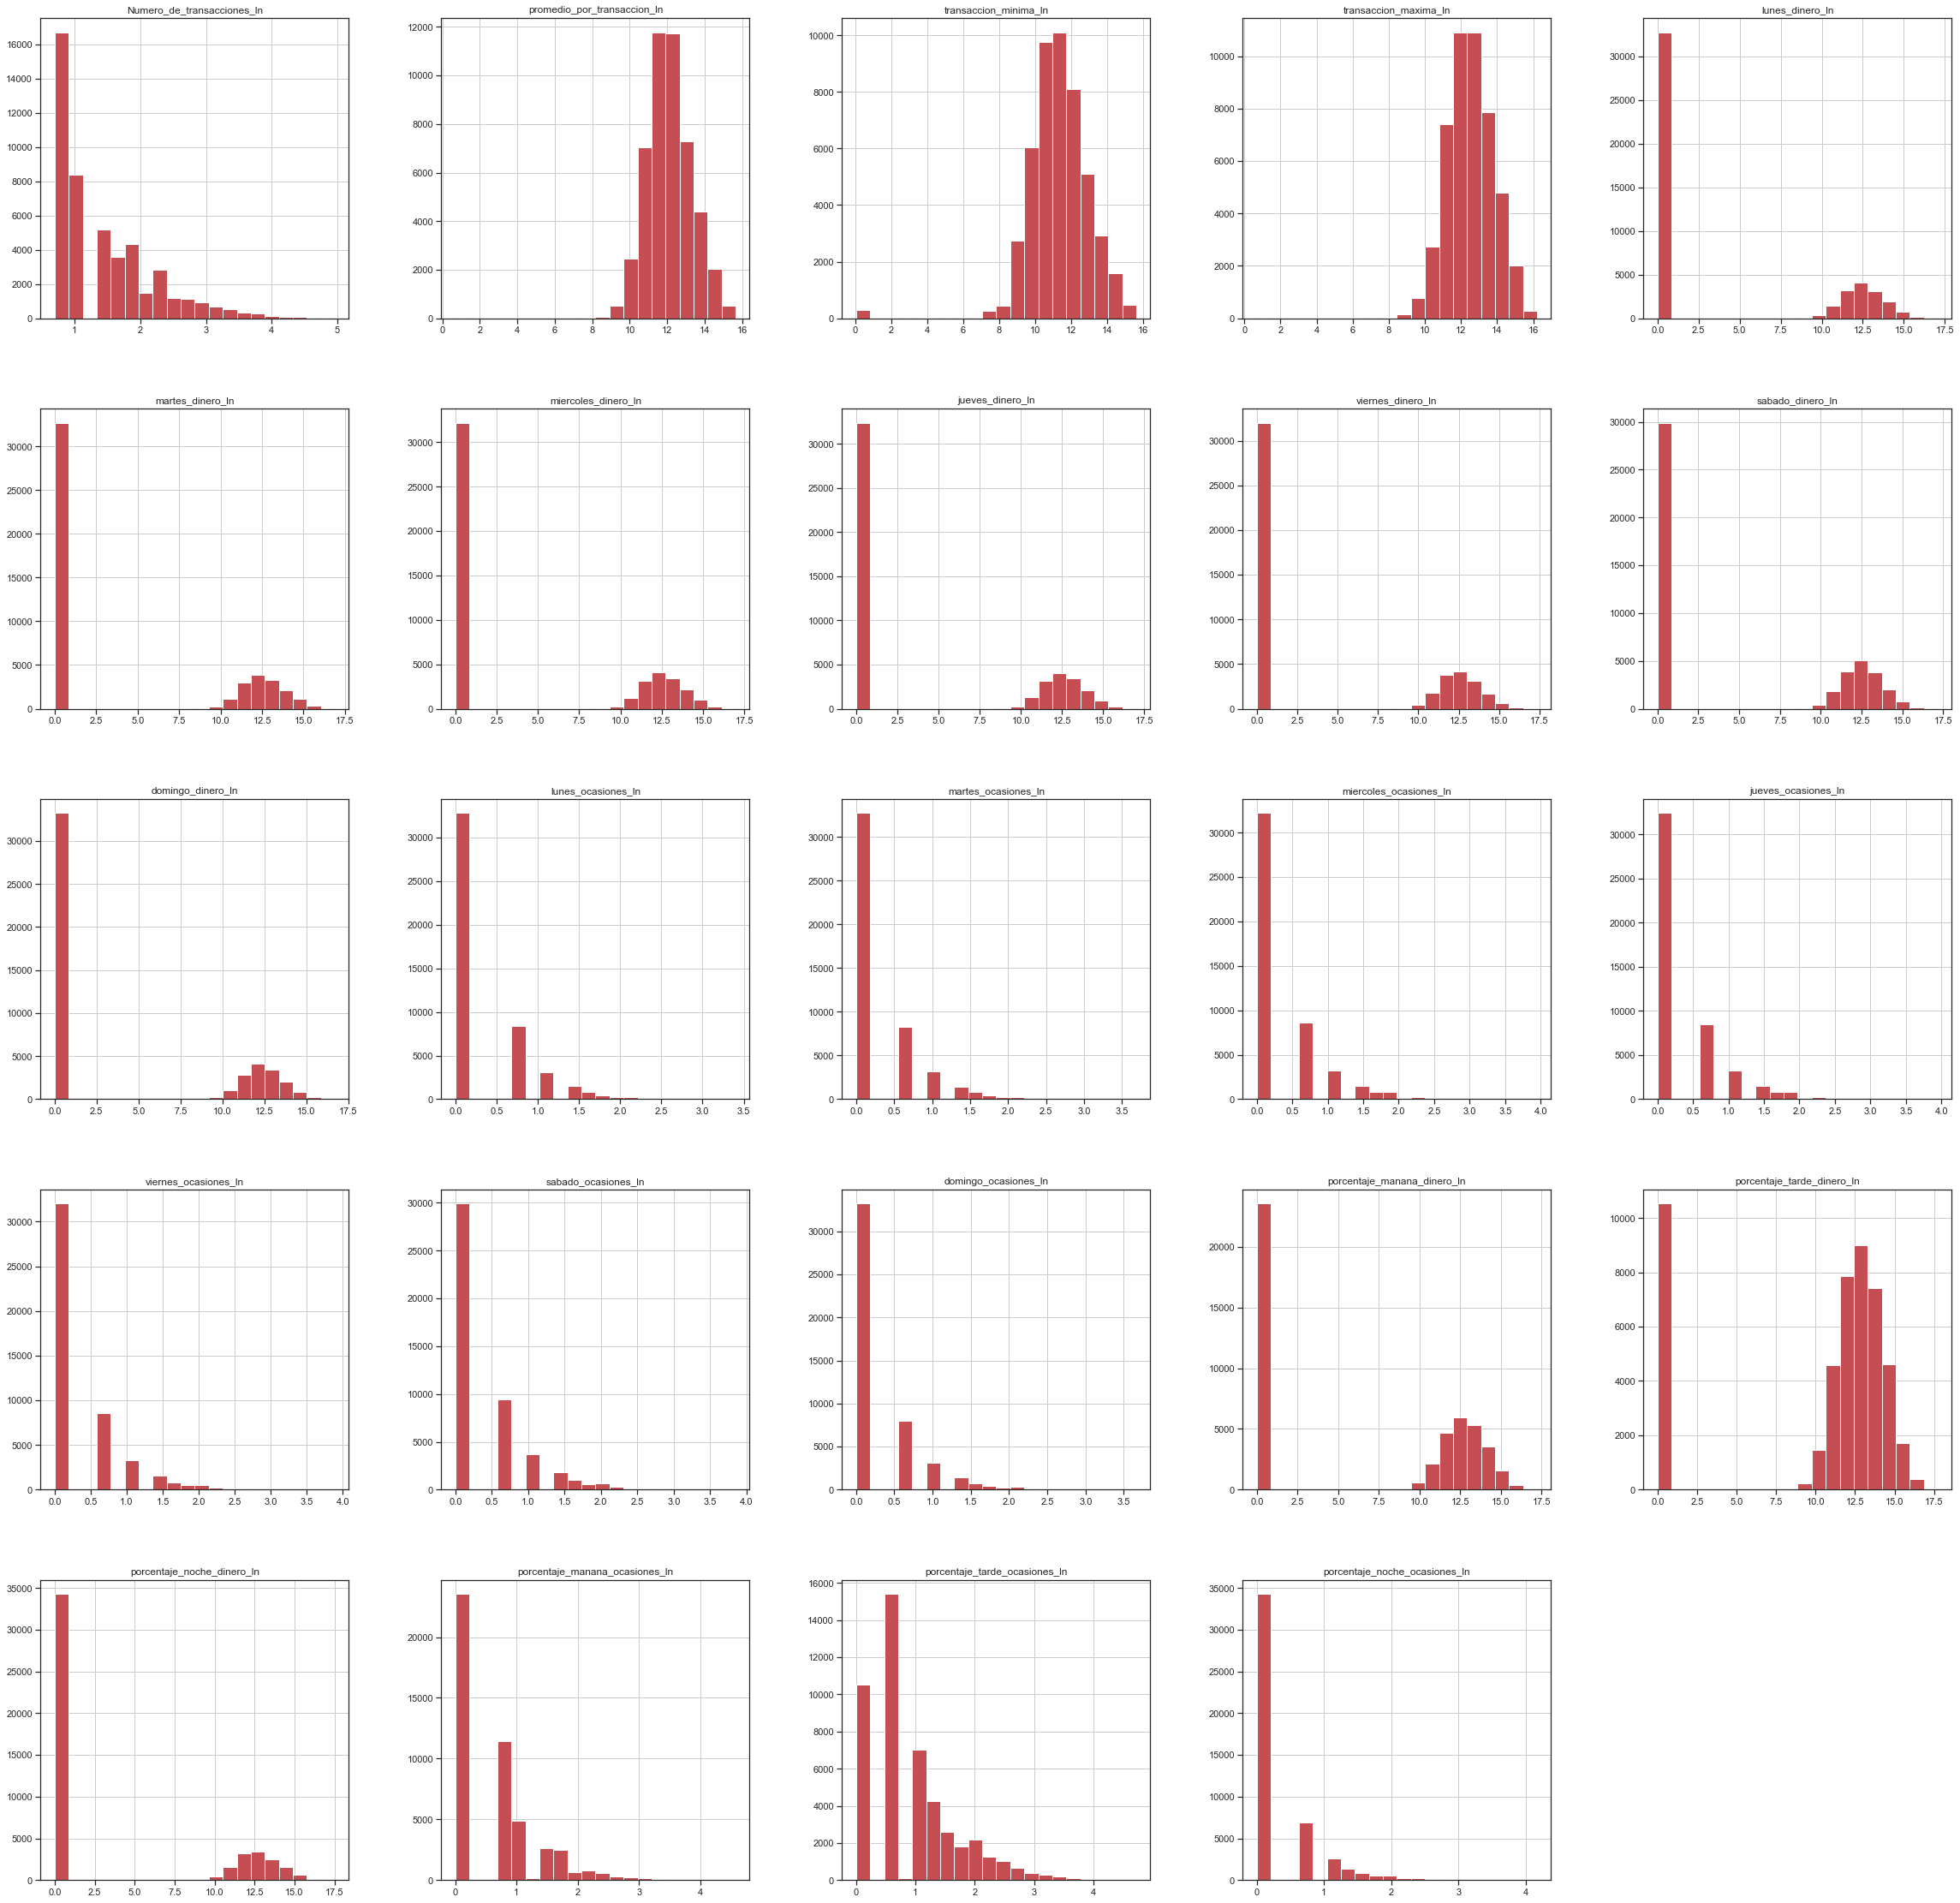

In [77]:
df[hist_cols_ln].hist(bins = 20, figsize=(40,40), color = 'r')

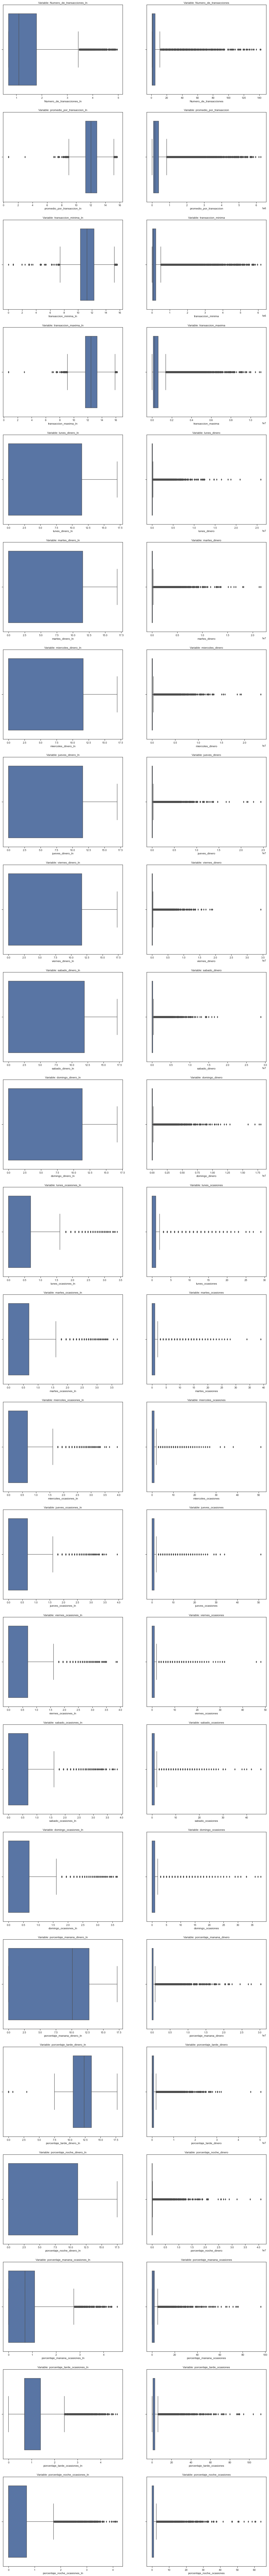

In [78]:
rows_sz= len(hist_col)
columns_sz=2
fig, axes = plt.subplots(rows_sz,columns_sz,figsize=(20,200))

for idx,column_plot in enumerate(hist_cols_ln): 

    sns.boxplot( ax=axes[idx,0],
    data=df,
    x=column_plot,)
    #id=idx
    #print(idx)
    axes[idx,0].set_title('Variable: {}'.format(column_plot))
    
for idx,column_plot in enumerate(hist_col): 

    sns.boxplot( ax=axes[idx,1],
    data=df,
    x=column_plot,)
    #id=idx
    #print(idx)
    axes[idx,1].set_title('Variable: {}'.format(column_plot))


### Correlation 

In [14]:
## Las columna promedio_transacciones y numero de transacciones fueron 
#  retiradas pues estan altamente correlacionada con las variabels de ocasiones y dinero
#  respectivamente.

## Las columnas seleccionadas para el modelo no utilizan transformaciones LN pues, 
# esto presento malos resultados en la prueba de silhouette score.

cols_modelo_5 = [#'porcentaje_visa_nacional_dinero', 'porcentaje_mastercard_nacional_dinero',
       #'porcentaje_visa_nacional_ocasiones', 'porcentaje_mastercard_nacional_ocasiones', 
       #'Numero_de_transacciones', 'promedio_por_transaccion', 
       'transaccion_minima', 'transaccion_maxima',
       'porcentaje_manana_dinero', 'porcentaje_tarde_dinero', 'porcentaje_noche_dinero',
       #'porcentaje_manana_ocasiones', 'porcentaje_tarde_ocasiones', 'porcentaje_noche_ocasiones',#
       'lunes_ocasiones', 'martes_ocasiones', 'miercoles_ocasiones', 'jueves_ocasiones', 'viernes_ocasiones', 'sabado_ocasiones', 'domingo_ocasiones',              
       #'lunes_dinero', 'martes_dinero', 'miercoles_dinero', 'jueves_dinero', 'viernes_dinero', 'sabado_dinero', 'domingo_dinero'#
       ]

# cols_modelo_5 = [ 
#       'transaccion_minima_ln', 'transaccion_maxima_ln',
#       'porcentaje_manana_dinero_ln', 'porcentaje_tarde_dinero_ln', 'porcentaje_noche_dinero_ln',
# #       'porcentaje_manana_ocasiones_ln', 'porcentaje_tarde_ocasiones_ln', 'porcentaje_noche_ocasiones_ln',
#       'lunes_dinero_ln', 'martes_dinero_ln', 'miercoles_dinero_ln', 'jueves_dinero_ln', 'viernes_dinero_ln', 'sabado_dinero_ln', 'domingo_dinero_ln', 
# #       'lunes_ocasiones_ln', 'martes_ocasiones_ln', 'miercoles_ocasiones_ln', 'jueves_ocasiones_ln', 'viernes_ocasiones_ln', 'sabado_ocasiones_ln', 'domingo_ocasiones_ln'
#       ]
       

In [57]:
corr_df=df[cols_modelo_5].corr(method='pearson')

<AxesSubplot:>

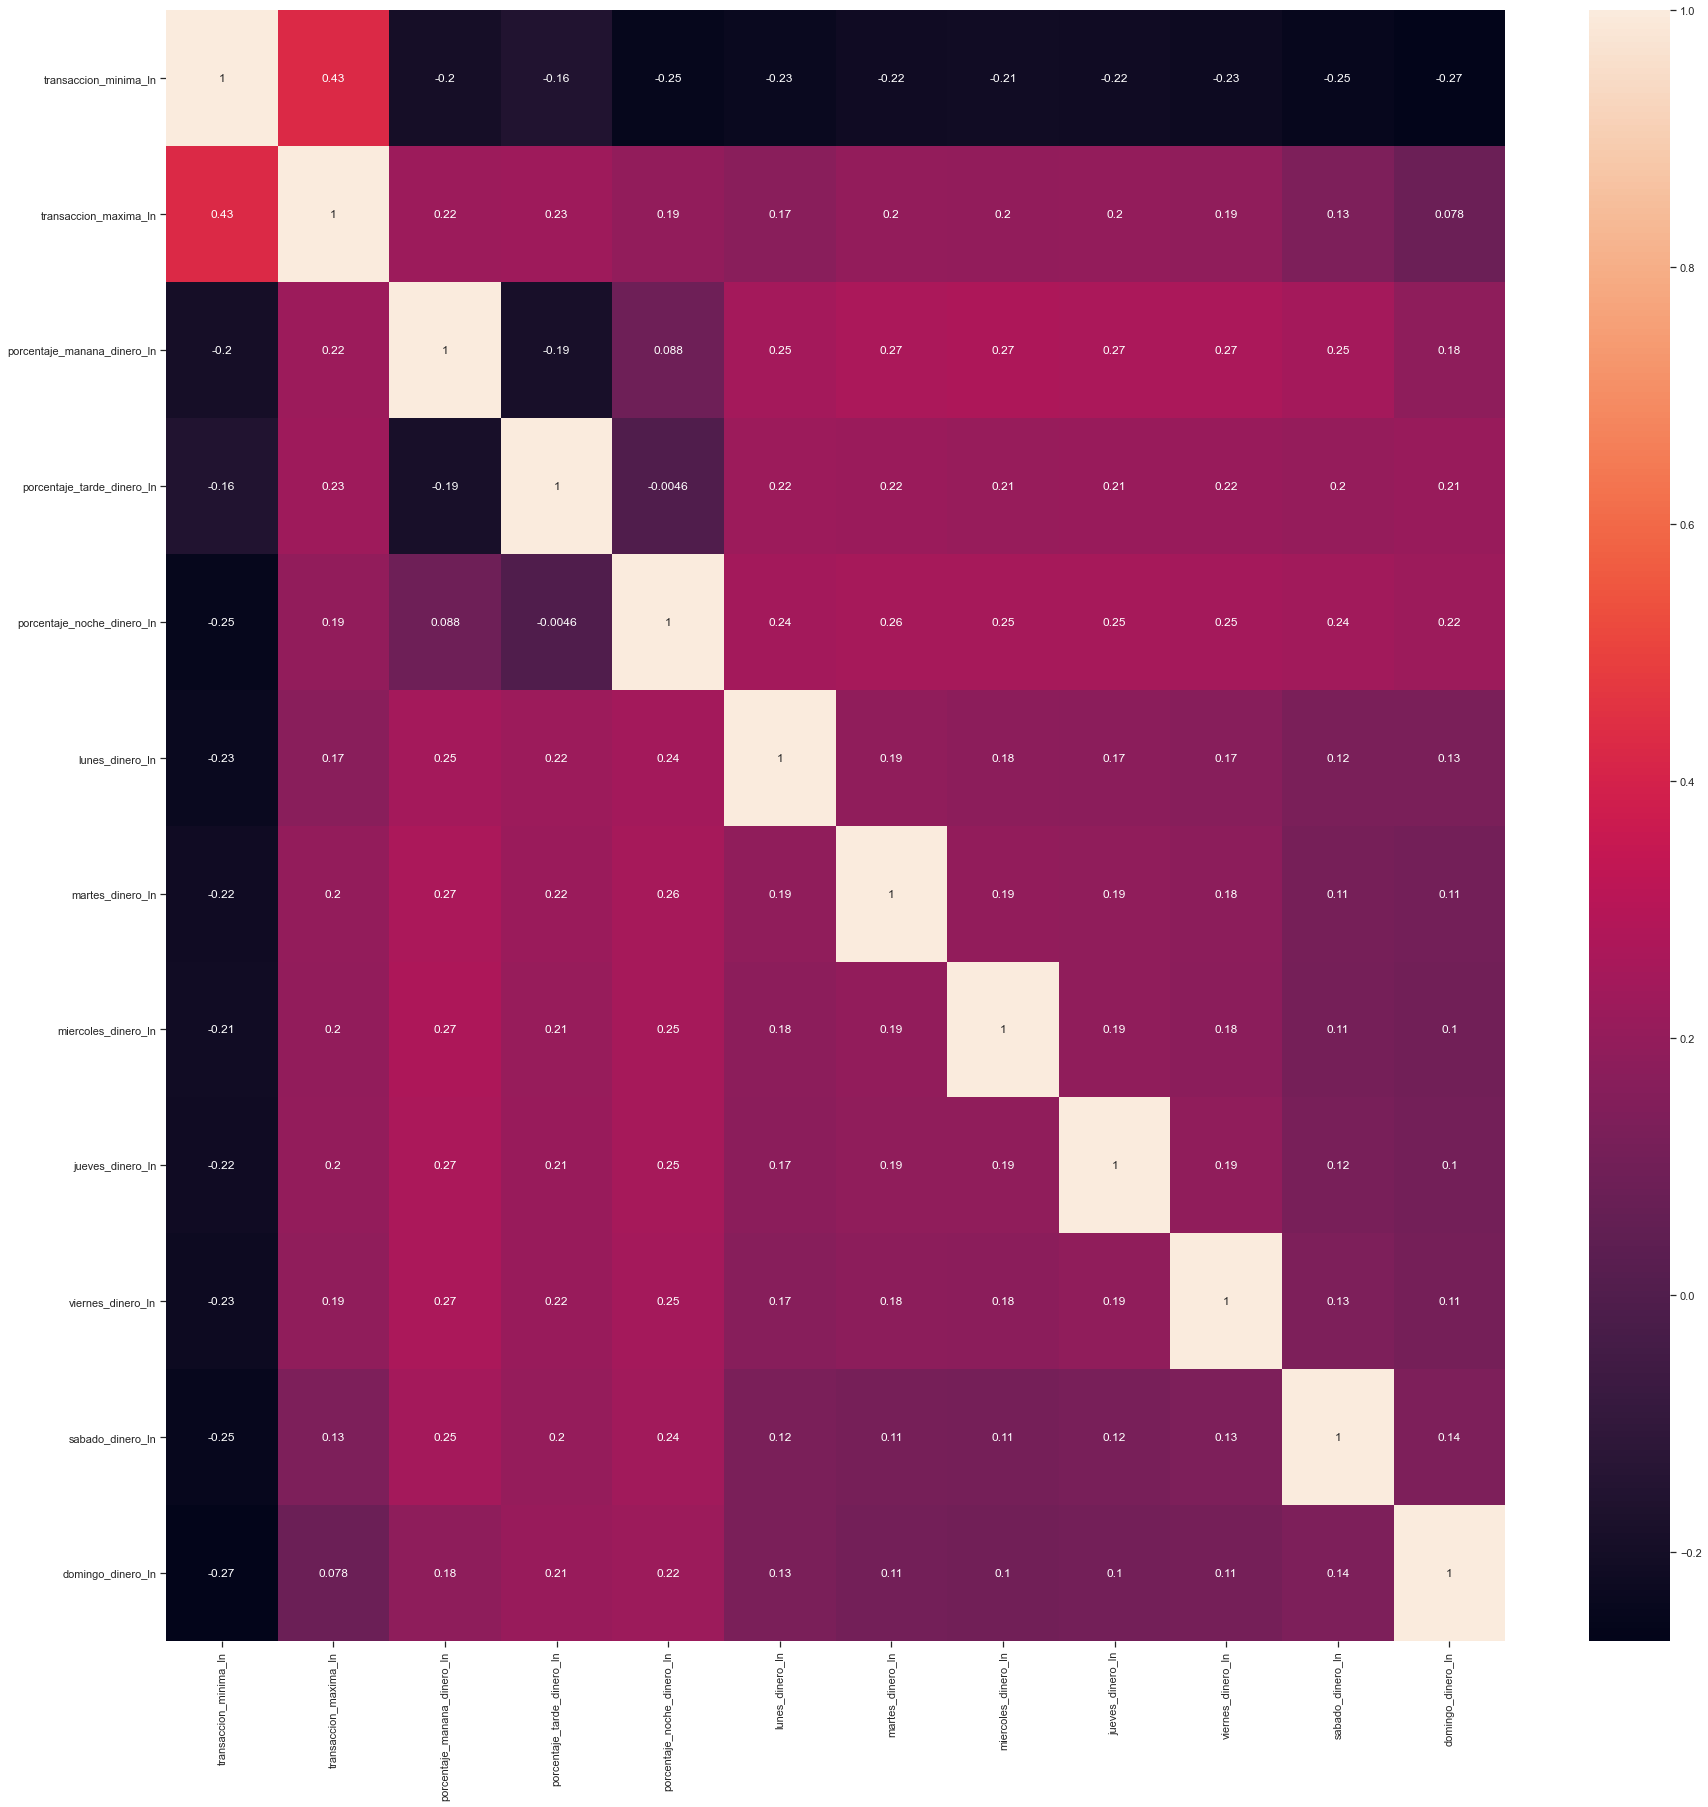

In [58]:
plt.figure(figsize=(30,30))
sns.heatmap(corr_df, annot=True)

In [31]:
df.sort_values(['promedio_por_transaccion'], ascending=False).head(100)

CLIENTE grupo_de_cliente  Numero_de_transacciones  \
43142    43143                A                        4   
19713    19714                A                        1   
23947    23948                A                        1   
16551    16552                A                        1   
4144      4145                A                        2   
...        ...              ...                      ...   
8376      8377                A                        2   
19067    19068                A                        1   
16349    16350                A                        1   
43362    43363                A                        1   
639        640                A                        6   

       promedio_por_transaccion  transaccion_minima  transaccion_maxima  \
43142                 6262025.0            548100.0           9000000.0   
19713                 6148920.0           6148920.0           6148920.0   
23947                 5966212.0           5966212.0           5966212.0   
16551                 5961903.0           5961903.0           5961903.0   
4144                  5845495.0           4673690.0           7017300.0   
...                         ...                 ...                 ...   
8376                  4600520.0           4600520.0           4600520.0   
19067                 4600000.0           4600000.0           4600000.0   
16349                 4600000.0           4600000.0           4600000.0   
43362                 4597554.0           4597554.0           4597554.0   
639                   4568639.5           1034000.0          10000000.0   

       desviacion_estandar_por_transaccion  porcentaje_visa_nacional  \
43142                            3859990.8                  0.000000   
19713                                  0.0                  1.000000   
23947                                  0.0                  0.000000   
16551                                  0.0                  0.000000   
4144                             1657182.5                  0.500000   
...                                    ...                       ...   
8376                                   0.0                  0.000000   
19067                                  0.0                  1.000000   
16349                                  0.0                  1.000000   
43362                                  0.0                  0.000000   
639                              3247546.8                  0.666667   

       porcentaje_visa_internacional  porcentaje_mastercard_nacional  ...  \
43142                            0.0                        1.000000  ...   
19713                            0.0                        0.000000  ...   
23947                            0.0                        1.000000  ...   
16551                            0.0                        1.000000  ...   
4144                             0.0                        0.500000  ...   
...                              ...                             ...  ...   
8376                             0.0                        1.000000  ...   
19067                            0.0                        0.000000  ...   
16349                            0.0                        0.000000  ...   
43362                            0.0                        1.000000  ...   
639                              0.0                        0.333333  ...   

       sabado_dinero  domingo_dinero  lunes_ocasiones  martes_ocasiones  \
43142            0.0             0.0              3.0               1.0   
19713            0.0             0.0              0.0               1.0   
23947            0.0             0.0              0.0               0.0   
16551      5961903.0             0.0              0.0               0.0   
4144             0.0             0.0              1.0               0.0   
...              ...             ...              ...               ...   
8376             0.0             0.0              0.0               0.

### Promedio por transaccion VS numero de transacciones

<AxesSubplot:xlabel='Numero_de_transacciones', ylabel='promedio_por_transaccion'>

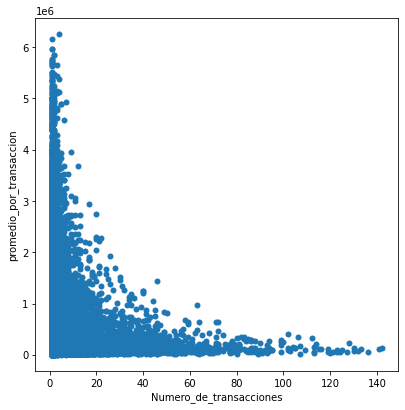

In [13]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Numero_de_transacciones', y="promedio_por_transaccion",
                #hue="Numero_de_transacciones",
                #palette="ch:r=-.2,d=.3_r",
                #hue_order=clarity_ranking,
                #sizes=(1, 8), 
                linewidth=0,
                data=df, ax=ax)

### Pareto Chart

In [7]:
df['total_money'] = df['promedio_por_transaccion']*df['Numero_de_transacciones']

In [8]:
df = df.sort_values(by='total_money', ascending=False)

In [9]:
df["cum_percentage"] = round(df["total_money"].cumsum()/df["total_money"].sum()*100,2)

In [10]:
df['CLIENTE'] = str(df['CLIENTE'])

In [11]:
df[df['cum_percentage'] < 80]['CLIENTE'].count()

13146

In [26]:
df_paretto = df[df['cum_percentage'] < 80].copy()
df_regular = df[df['cum_percentage'] >= 80].copy()

In [104]:
df.shape
## Paretto clients are equivalent to 27% of total clients

(47871, 77)

Text(0.5, 1.0, 'Regular Clients')

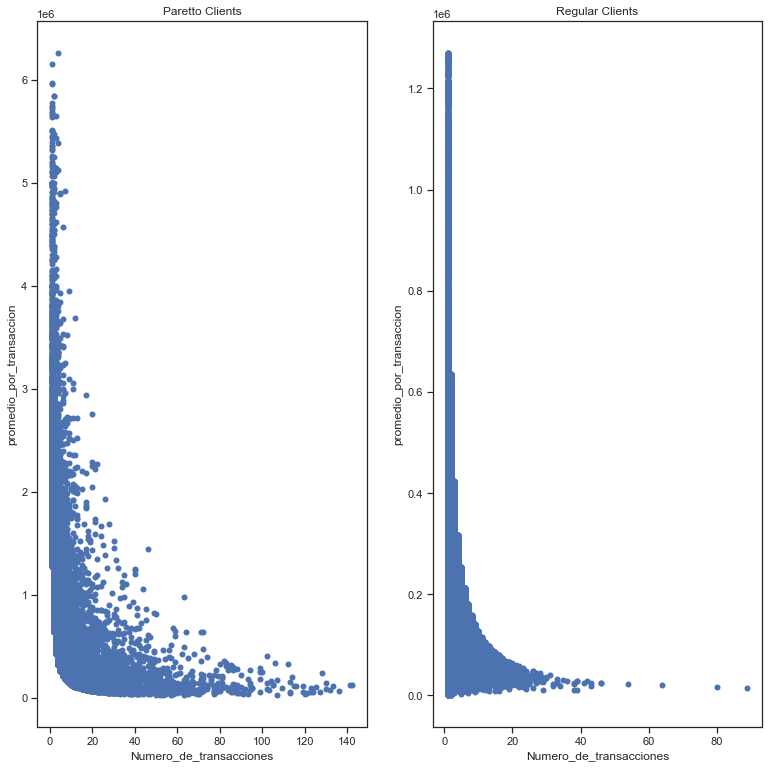

In [138]:
f, ax = plt.subplots(1,2,figsize=(6.5 *2, 6.5*2))
sns.scatterplot(x='Numero_de_transacciones', y="promedio_por_transaccion",
                #hue="Numero_de_transacciones",
                #palette="ch:r=-.2,d=.3_r",
                #hue_order=clarity_ranking,
                #sizes=(1, 8), 
                linewidth=0,
                data=df_paretto, ax=ax[0])
ax[0].set_title('Paretto Clients')
sns.scatterplot(x='Numero_de_transacciones', y="promedio_por_transaccion",
                #hue="Numero_de_transacciones",
                #palette=['red'],
                #hue_order=clarity_ranking,
                #sizes=(1, 8), 
                linewidth=0,
                data=df_clients, ax=ax[1])
ax[1].set_title('Regular Clients')

In [105]:
# from matplotlib.ticker import PercentFormatter

# # Set figure and axis
# fig, ax = plt.subplots(figsize=(22,10))

# # Plot bars (i.e. frequencies)
# ax.bar(df['CLIENTE'].head(10), df["total_money"].head(10))
# ax.set_title("Pareto Chart")
# ax.set_xlabel("Total Amount Spent")
# ax.set_ylabel("Frequency");

# # # Second y axis (i.e. cumulative percentage)
# # ax2 = ax.twinx()
# # ax2.plot(df.index, df["cum_percentage"], color="red", marker="D", ms=7)
# # ax2.axhline(80, color="orange", linestyle="dashed")
# # ax2.yaxis.set_major_formatter(PercentFormatter())
# # ax2.set_ylabel("Cumulative Percentage");

### Clustering

#### Clustering Regular clients

In [15]:
scaler =StandardScaler()
scaled_features = scaler.fit_transform(df_regular[cols_modelo_5])

In [16]:
pd.DataFrame(scaled_features, columns=cols_modelo_5).describe().T

count          mean       std       min       25%  \
transaccion_minima        34725.0 -1.309568e-16  1.000014 -0.738594 -0.588304   
transaccion_maxima        34725.0 -9.821757e-17  1.000014 -1.073181 -0.690976   
porcentaje_manana_dinero  34725.0  1.309568e-17  1.000014 -0.562689 -0.562689   
porcentaje_tarde_dinero   34725.0 -1.309568e-17  1.000014 -0.863470 -0.863470   
porcentaje_noche_dinero   34725.0  6.547838e-18  1.000014 -0.362787 -0.362787   
lunes_ocasiones           34725.0 -1.276828e-16  1.000014 -0.450915 -0.450915   
martes_ocasiones          34725.0  2.619135e-17  1.000014 -0.453217 -0.453217   
miercoles_ocasiones       34725.0 -3.273919e-17  1.000014 -0.461479 -0.461479   
jueves_ocasiones          34725.0 -9.166973e-17  1.000014 -0.453966 -0.453966   
viernes_ocasiones         34725.0 -1.080393e-16  1.000014 -0.464737 -0.464737   
sabado_ocasiones          34725.0 -1.964351e-17  1.000014 -0.507112 -0.507112   
domingo_ocasiones         34725.0 -5.893054e-17  1.000014 -0.458057 -0.458057   

                               50%       75%        max  
transaccion_minima       -0.378040  0.143863   5.277731  
transaccion_maxima       -0.313211  0.304545   4.584398  
porcentaje_manana_dinero -0.562689  0.190767   5.687718  
porcentaje_tarde_dinero  -0.342020  0.424184   3.929006  
porcentaje_noche_dinero  -0.362787 -0.362787   9.100323  
lunes_ocasiones          -0.450915 -0.450915  18.392907  
martes_ocasiones         -0.453217 -0.453217  17.750791  
miercoles_ocasiones      -0.461479  0.720732  22.000525  
jueves_ocasiones         -0.453966  0.709942  19.332460  
viernes_ocasiones        -0.464737  0.677210  18.948366  
sabado_ocasiones         -0.507112  0.426186  19.092127  
domingo_ocasiones        -0.458057  0.604611  20.795304

In [17]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

##### GAP Statistics

In [152]:
# Gap Statistic for K means
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
# Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
# For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
# Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)

Text(0.5, 1.0, 'Gap Statistic vs. K')

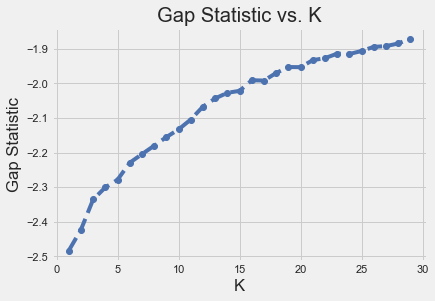

In [153]:
## 
score_g, df_n = optimalK(scaled_features, nrefs=1, maxClusters=30)
plt.plot(df_n['clusterCount'], df_n['gap'], linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic vs. K')

Text(0.5, 1.0, 'Gap Statistic vs. K')

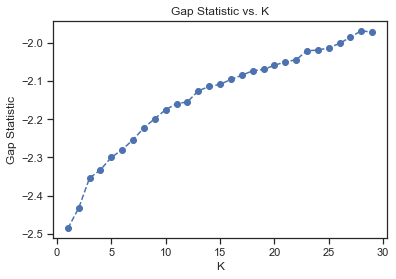

In [144]:
## LN transformed
score_g, df_n = optimalK(scaled_features, nrefs=1, maxClusters=30)
plt.plot(df_n['clusterCount'], df_n['gap'], linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic vs. K')

##### Silhouette Score

In [154]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

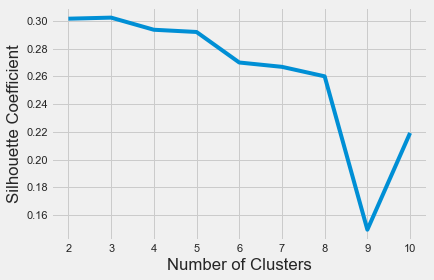

In [155]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

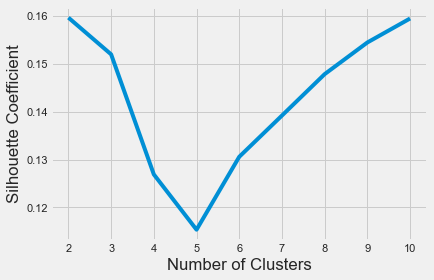

In [146]:
## LN Transformed
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

##### Trainning

In [18]:
modelo_5 = KMeans(n_clusters=3).fit(scaled_features)

In [28]:
labels = modelo_5.predict(scaled_features)
df_regular['cluster_6'] = labels

In [29]:
df_regular.groupby('cluster_6')['CLIENTE'].count()

cluster_6
0    24188
1     5076
2     5461
Name: CLIENTE, dtype: int64

<AxesSubplot:xlabel='Numero_de_transacciones', ylabel='promedio_por_transaccion'>

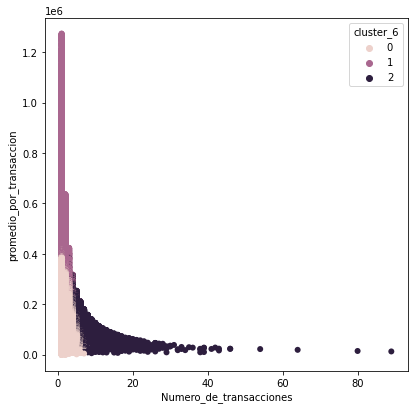

In [30]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Numero_de_transacciones', y="promedio_por_transaccion",
                hue="cluster_6",
                #palette="ch:r=-.2,d=.3_r",
                #hue_order=clarity_ranking,
                #sizes=(1, 8), 
                linewidth=0,
                data=df_regular, ax=ax)

In [31]:
df_paretto[cluster] = 10
df_total = df_regular.append(df_paretto)

In [32]:
#pd.set_option('max_rows', None) ## Configuracion para mostrar todas las filas sin restriccion
crosstab_sitios_consumo = pd.crosstab(df_total['Sitio_consumo_masfrecuente'], df_total['cluster_6'])

<AxesSubplot:xlabel='cluster_6', ylabel='Sitio_consumo_masfrecuente'>

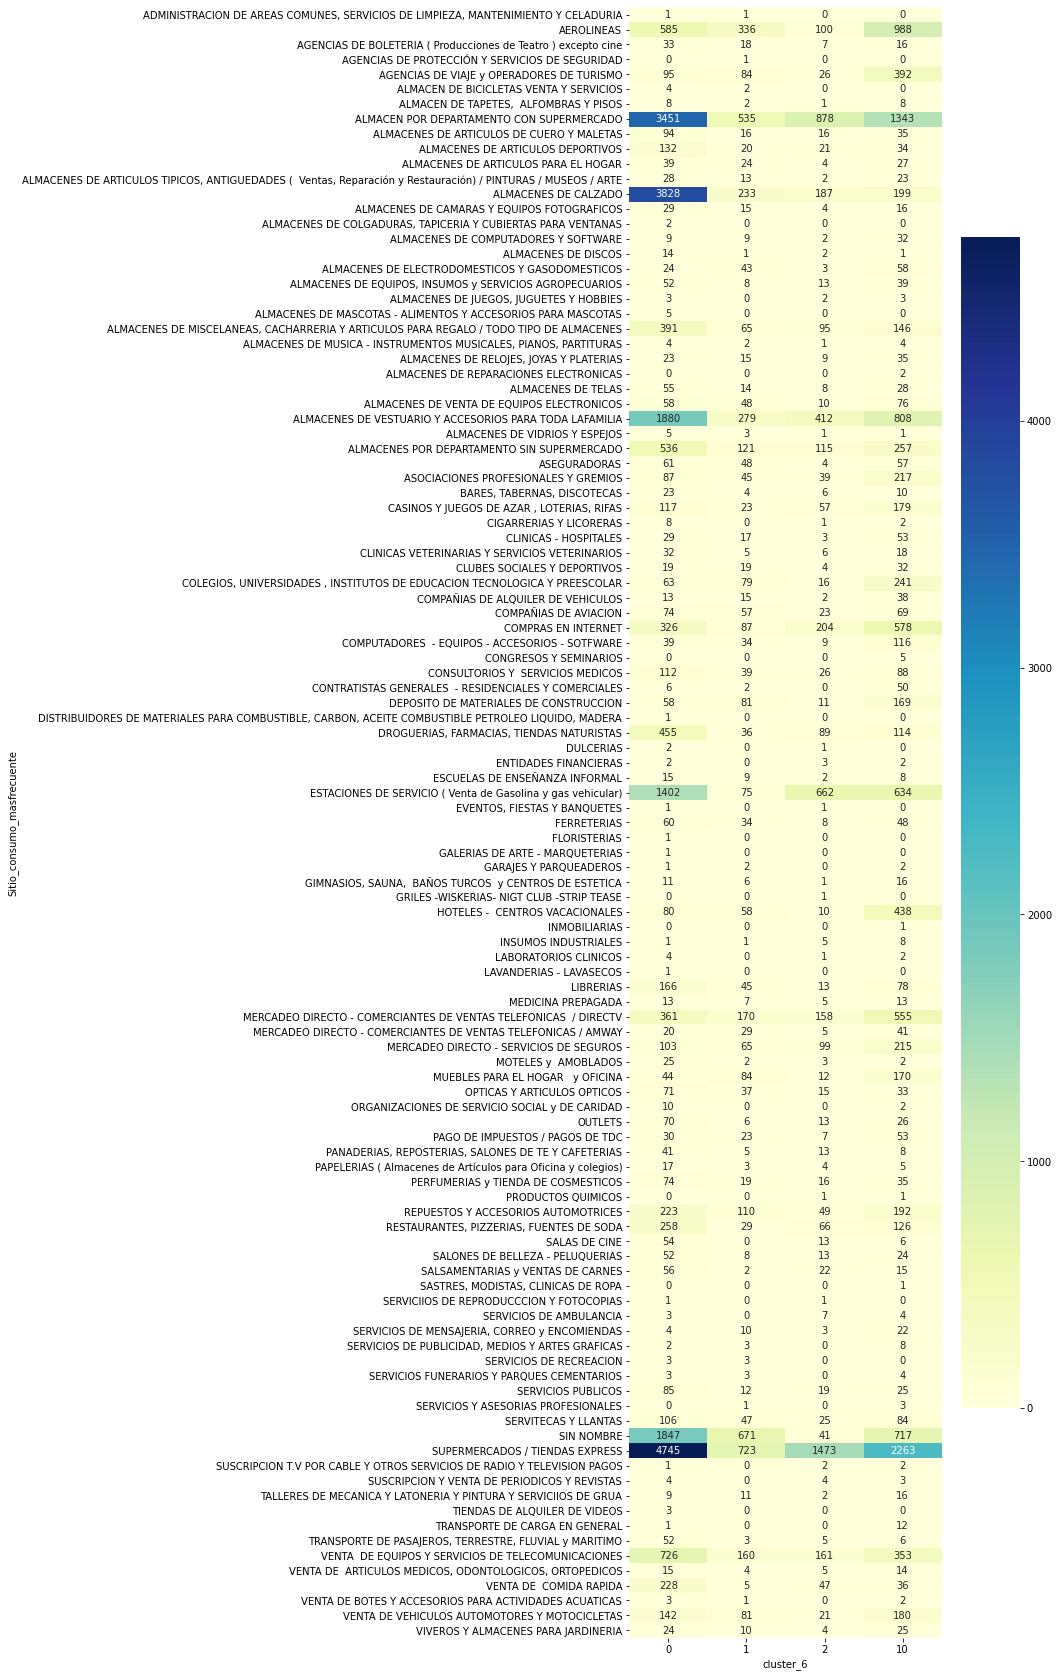

In [33]:
plt.figure(figsize=(7,30))
sns.heatmap(crosstab_sitios_consumo , annot=True, fmt ='d', cmap="YlGnBu")

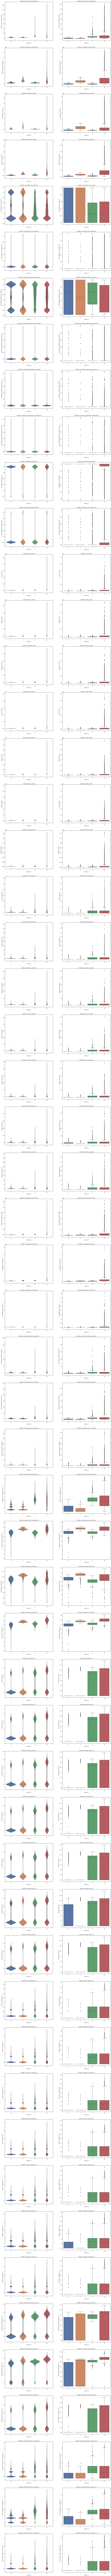

In [34]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(style="ticks")

graph_columns = [ 
       'Numero_de_transacciones', 'promedio_por_transaccion', 'transaccion_minima', 'transaccion_maxima',
       'porcentaje_visa_nacional', 'porcentaje_visa_internacional', 
       'porcentaje_mastercard_nacional', 'porcentaje_mastercard_internacional', 
       'Porcentaje_otrafranquicia_nacional', 'porcentaje_otrafranquicia_internacional', 
       'porcentaje_nacional_total', 'porcentaje_internacional_total', 
#       'porcentaje_manana', 'porcentaje_tarde', 'porcentaje_noche', 
#       'porcDOMINGO', 'porcLUNES', 'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES', 'porcSABADO',
       'lunes_dinero', 'martes_dinero', 'miercoles_dinero', 'jueves_dinero', 'viernes_dinero', 'sabado_dinero', 'domingo_dinero',  
       'lunes_ocasiones', 'martes_ocasiones', 'miercoles_ocasiones', 'jueves_ocasiones', 'viernes_ocasiones', 'sabado_ocasiones', 'domingo_ocasiones',
       'porcentaje_manana_dinero', 'porcentaje_tarde_dinero', 'porcentaje_noche_dinero',
       'porcentaje_manana_ocasiones', 'porcentaje_tarde_ocasiones', 'porcentaje_noche_ocasiones',
       
       'Numero_de_transacciones_ln', 'promedio_por_transaccion_ln', 'transaccion_minima_ln', 'transaccion_maxima_ln',       
       'lunes_dinero_ln', 'martes_dinero_ln', 'miercoles_dinero_ln', 'jueves_dinero_ln', 'viernes_dinero_ln', 'sabado_dinero_ln', 'domingo_dinero_ln', 
       'lunes_ocasiones_ln', 'martes_ocasiones_ln', 'miercoles_ocasiones_ln', 'jueves_ocasiones_ln', 'viernes_ocasiones_ln', 'sabado_ocasiones_ln', 'domingo_ocasiones_ln',
       'porcentaje_manana_dinero_ln', 'porcentaje_tarde_dinero_ln', 'porcentaje_noche_dinero_ln',
       'porcentaje_manana_ocasiones_ln', 'porcentaje_tarde_ocasiones_ln', 'porcentaje_noche_ocasiones_ln',
       ]
cluster = 'cluster_6'

rows_sz= len(graph_columns)
columns_sz=2
fig, axes = plt.subplots(rows_sz,columns_sz,figsize=(20,500))


for idx,column in enumerate(graph_columns):

    sns.violinplot( ax=axes[idx,0],
    data=df_total,
    x=cluster, y=column)
    #id=idx
    #print(idx)
    axes[idx,0].set_title('Variable: {}'.format(column))
for idx,column in enumerate(graph_columns):

    sns.boxplot( ax=axes[idx,1],
    data=df_total,
    x=cluster, y=column)
    #id=idx
    #print(idx)
    axes[idx,1].set_title('Variable: {}'.format(column))

#### Clustering whole Dataframe

In [35]:
scaler =StandardScaler()
scaled_features = scaler.fit_transform(df[cols_modelo_5])

In [36]:
pd.DataFrame(scaled_features, columns=cols_modelo_5).describe().T

count          mean      std       min       25%  \
transaccion_minima        47871.0 -5.699660e-17  1.00001 -0.488448 -0.429199   
transaccion_maxima        47871.0  1.899887e-17  1.00001 -0.655889 -0.526910   
porcentaje_manana_dinero  47871.0 -9.499433e-17  1.00001 -0.365488 -0.365488   
porcentaje_tarde_dinero   47871.0 -4.749716e-17  1.00001 -0.455789 -0.433345   
porcentaje_noche_dinero   47871.0 -9.499433e-18  1.00001 -0.236209 -0.236209   
lunes_ocasiones           47871.0 -1.899887e-17  1.00001 -0.432823 -0.432823   
martes_ocasiones          47871.0  2.849830e-17  1.00001 -0.423018 -0.423018   
miercoles_ocasiones       47871.0 -3.799773e-17  1.00001 -0.431122 -0.431122   
jueves_ocasiones          47871.0  0.000000e+00  1.00001 -0.418057 -0.418057   
viernes_ocasiones         47871.0  9.499433e-18  1.00001 -0.426882 -0.426882   
sabado_ocasiones          47871.0 -9.499433e-18  1.00001 -0.453892 -0.453892   
domingo_ocasiones         47871.0 -3.324802e-17  1.00001 -0.407043 -0.407043   

                               50%       75%        max  
transaccion_minima       -0.334053 -0.068107  11.378606  
transaccion_maxima       -0.364576  0.052709  11.812911  
porcentaje_manana_dinero -0.343827 -0.062574  25.988131  
porcentaje_tarde_dinero  -0.320772 -0.005704  29.414158  
porcentaje_noche_dinero  -0.236209 -0.164271  41.254993  
lunes_ocasiones          -0.432823  0.209747  18.201720  
martes_ocasiones         -0.423018  0.186362  23.342806  
miercoles_ocasiones      -0.431122  0.171630  30.309215  
jueves_ocasiones         -0.418057  0.165986  29.368136  
viernes_ocasiones        -0.426882  0.152201  27.369082  
sabado_ocasiones         -0.453892  0.066010  23.461611  
domingo_ocasiones        -0.407043  0.196749  22.537053

In [37]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

##### Gap Statistics

In [62]:
# Gap Statistic for K means
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
# Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
# For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
# Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)


Text(0.5, 1.0, 'Gap Statistic vs. K')

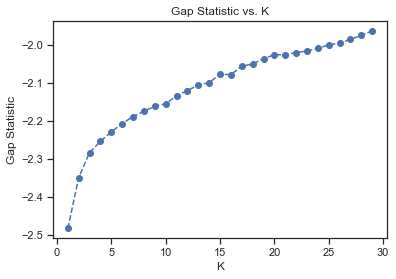

In [63]:
## LN transformation
score_g, df_n = optimalK(scaled_features, nrefs=1, maxClusters=30)
plt.plot(df_n['clusterCount'], df_n['gap'], linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic vs. K')

Text(0.5, 1.0, 'Gap Statistic vs. K')

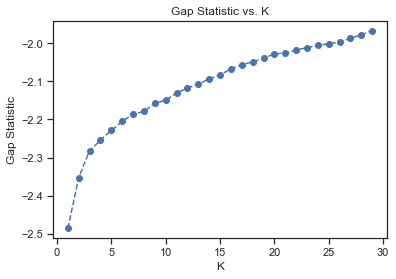

In [116]:
score_g, df_n = optimalK(scaled_features, nrefs=1, maxClusters=30)
plt.plot(df_n['clusterCount'], df_n['gap'], linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic vs. K')

##### WSS Score

In [117]:
from sklearn.cluster import KMeans

# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

In [118]:
wss_scores = calculate_WSS(scaled_features, 11)

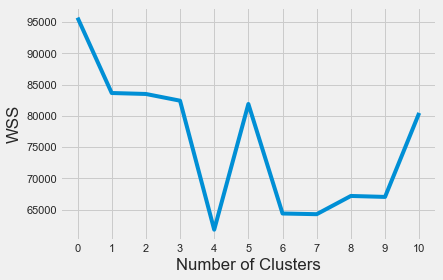

In [119]:
plt.style.use("fivethirtyeight")
plt.plot(range( 11), wss_scores)
plt.xticks(range( 11))
plt.xlabel("Number of Clusters")
plt.ylabel("WSS")
plt.show()

##### Silhouette Score

In [120]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

###### Silhoutte score with no variable transformations

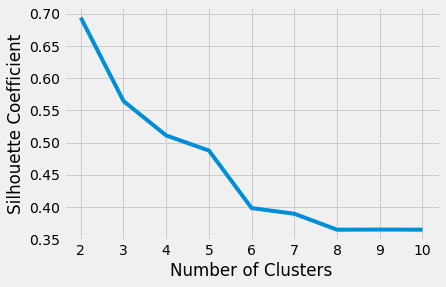

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

###### Silhouette Score with ln variable transformations

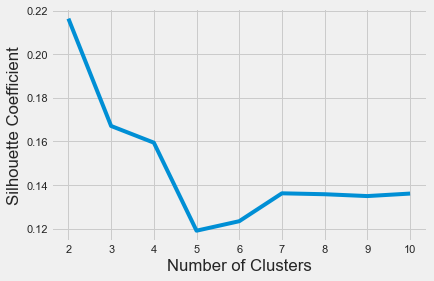

In [121]:
## Las variables transformadas con ln empeoran los resultados 
# en la agrupacion de clusters, por lo cual se descartan
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
### Clustering
scaler =StandardScaler()
scaled_features = scaler.fit_transform(df[cols_modelo_5])
pd.DataFrame(scaled_features, columns=cols_modelo_5).describe().T
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
#### Gap Statistics
# Gap Statistic for K means
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
# Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
# For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
# Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)

## LN transformation
score_g, df_n = optimalK(scaled_features, nrefs=1, maxClusters=30)
plt.plot(df_n['clusterCount'], df_n['gap'], linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic vs. K')
score_g, df_n = optimalK(scaled_features, nrefs=1, maxClusters=30)
plt.plot(df_n['clusterCount'], df_n['gap'], linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic vs. K')
#### WSS Score
from sklearn.cluster import KMeans

# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse
wss_scores = calculate_WSS(scaled_features, 11)
plt.style.use("fivethirtyeight")
plt.plot(range( 11), wss_scores)
plt.xticks(range( 11))
plt.xlabel("Number of Clusters")
plt.ylabel("WSS")
plt.show()
#### Silhouette Score
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)
##### Silhoutte score with no variable transformations
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()
##### Silhouette Score with ln variable transformations
## Las variables transformadas con ln empeoran los resultados 
# en la agrupacion de clusters, por lo cual se descartan
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

##### Trainning

In [59]:
modelo_5 = KMeans(n_clusters=3).fit(scaled_features)

In [60]:
labels = modelo_5.predict(scaled_features)
df['cluster_5'] = labels

In [61]:
df.groupby('cluster_5')['CLIENTE'].count()

cluster_5
0     1856
1     4091
2    41924
Name: CLIENTE, dtype: int64

In [62]:
centroids = modelo_5.cluster_centers_
centroids_df = pd.DataFrame(centroids,columns=cols_modelo_5).T
centroids_df

0         1         2
transaccion_minima       -0.435389  2.054698 -0.181225
transaccion_maxima        0.611259  2.403314 -0.261579
porcentaje_manana_dinero  1.710267  1.070929 -0.180217
porcentaje_tarde_dinero   2.028023  1.196658 -0.206553
porcentaje_noche_dinero   1.394937  0.679760 -0.128087
lunes_ocasiones           2.749216 -0.064496 -0.115416
martes_ocasiones          2.828103 -0.023667 -0.122892
miercoles_ocasiones       2.831727 -0.048490 -0.120630
jueves_ocasiones          2.853968 -0.052299 -0.121243
viernes_ocasiones         2.875699 -0.051207 -0.122312
sabado_ocasiones          2.666082 -0.176848 -0.100772
domingo_ocasiones         2.351011 -0.179164 -0.086598

<AxesSubplot:xlabel='Numero_de_transacciones', ylabel='promedio_por_transaccion'>

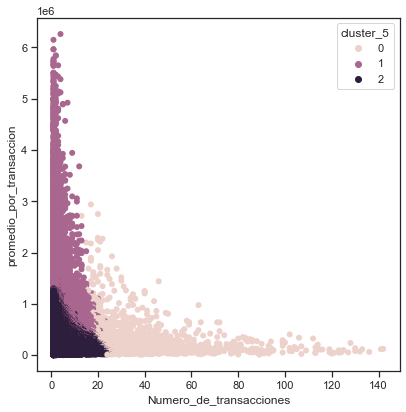

In [63]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Numero_de_transacciones', y="promedio_por_transaccion",
                hue="cluster_5",
                #palette="ch:r=-.2,d=.3_r",
                #hue_order=clarity_ranking,
                #sizes=(1, 8), 
                linewidth=0,
                data=df, ax=ax)

In [56]:
#pd.set_option('max_rows', None) ## Configuracion para mostrar todas las filas sin restriccion
crosstab_sitios_consumo = pd.crosstab(df['Sitio_consumo_masfrecuente'], df['cluster_5'])

<AxesSubplot:xlabel='cluster_5', ylabel='Sitio_consumo_masfrecuente'>

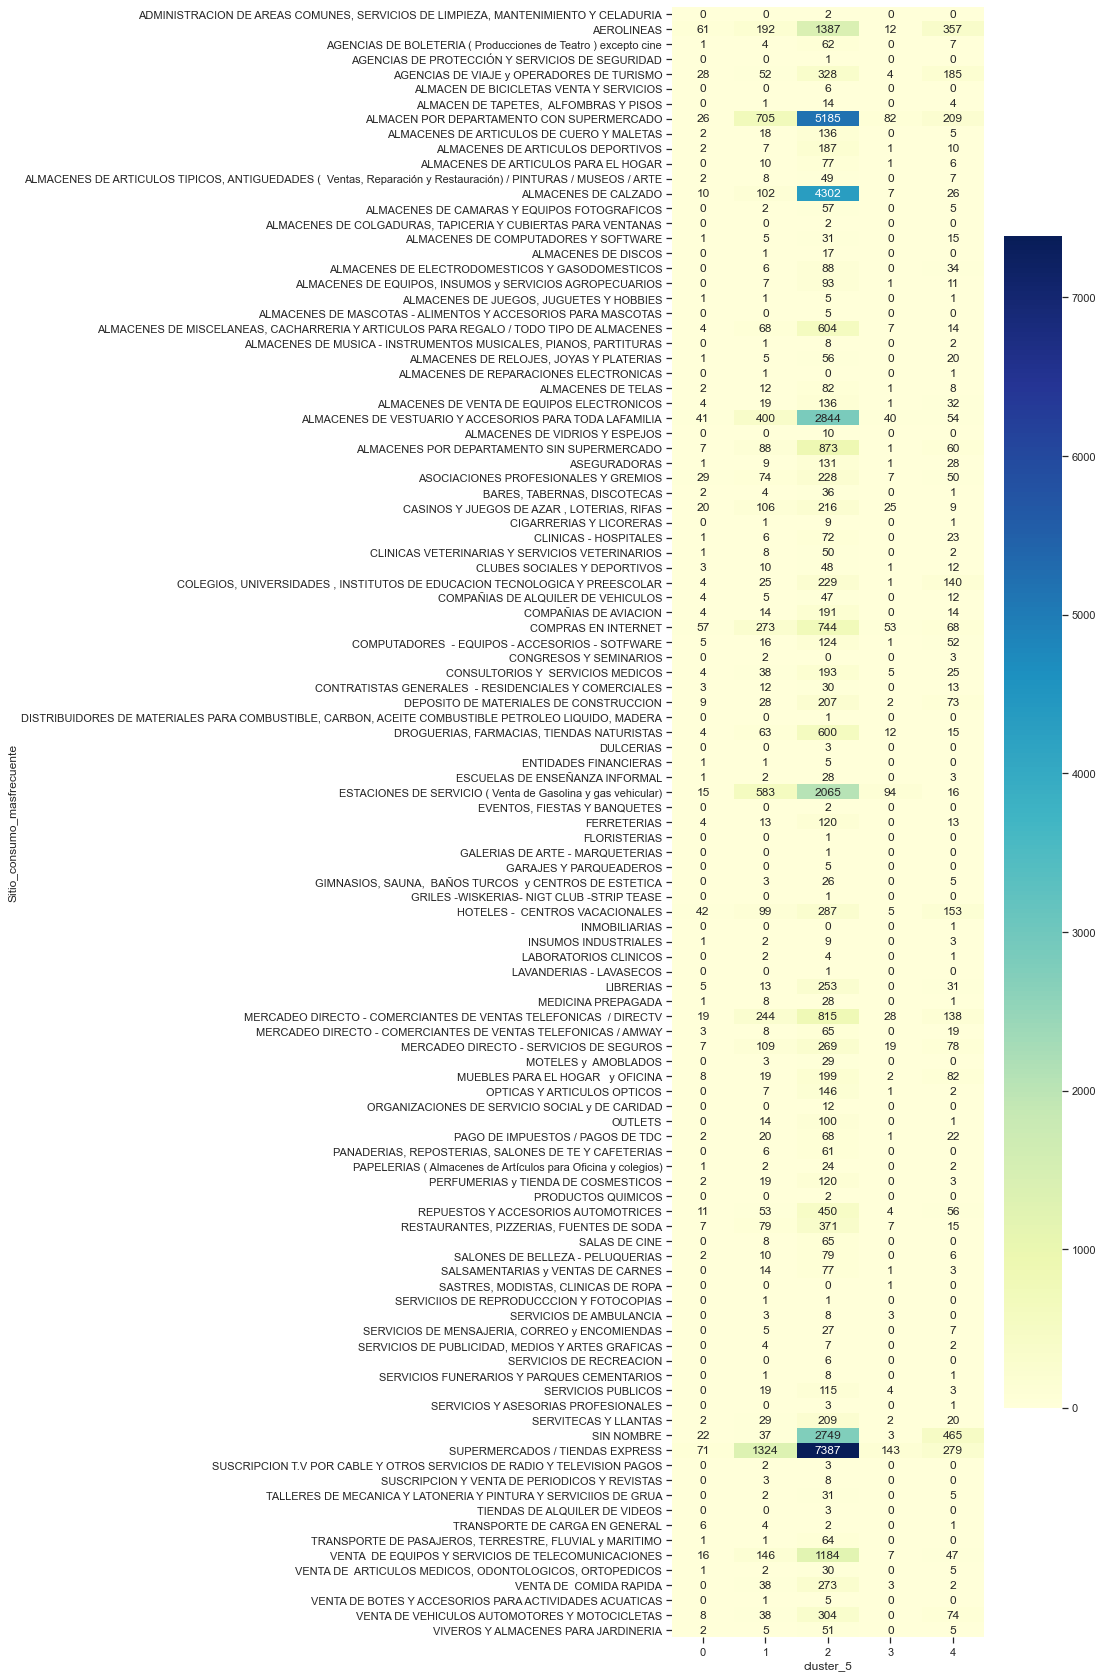

In [57]:
plt.figure(figsize=(7,30))
sns.heatmap(crosstab_sitios_consumo , annot=True, fmt ='d', cmap="YlGnBu")

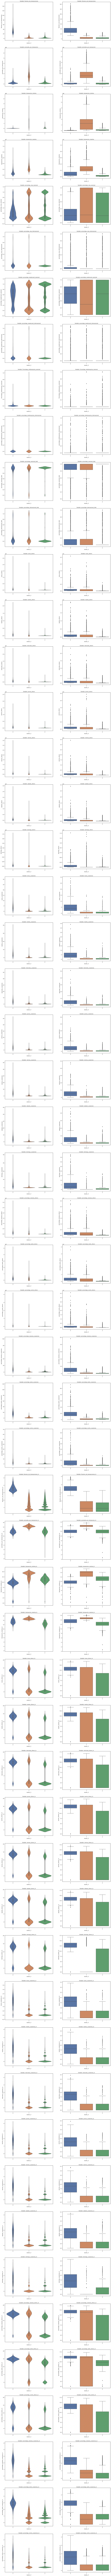

In [64]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(style="ticks")

graph_columns = [ 
       'Numero_de_transacciones', 'promedio_por_transaccion', 'transaccion_minima', 'transaccion_maxima',
       'porcentaje_visa_nacional', 'porcentaje_visa_internacional', 
       'porcentaje_mastercard_nacional', 'porcentaje_mastercard_internacional', 
       'Porcentaje_otrafranquicia_nacional', 'porcentaje_otrafranquicia_internacional', 
       'porcentaje_nacional_total', 'porcentaje_internacional_total', 
#       'porcentaje_manana', 'porcentaje_tarde', 'porcentaje_noche', 
#       'porcDOMINGO', 'porcLUNES', 'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES', 'porcSABADO',
       'lunes_dinero', 'martes_dinero', 'miercoles_dinero', 'jueves_dinero', 'viernes_dinero', 'sabado_dinero', 'domingo_dinero',  
       'lunes_ocasiones', 'martes_ocasiones', 'miercoles_ocasiones', 'jueves_ocasiones', 'viernes_ocasiones', 'sabado_ocasiones', 'domingo_ocasiones',
       'porcentaje_manana_dinero', 'porcentaje_tarde_dinero', 'porcentaje_noche_dinero',
       'porcentaje_manana_ocasiones', 'porcentaje_tarde_ocasiones', 'porcentaje_noche_ocasiones',
       
       'Numero_de_transacciones_ln', 'promedio_por_transaccion_ln', 'transaccion_minima_ln', 'transaccion_maxima_ln',       
       'lunes_dinero_ln', 'martes_dinero_ln', 'miercoles_dinero_ln', 'jueves_dinero_ln', 'viernes_dinero_ln', 'sabado_dinero_ln', 'domingo_dinero_ln', 
       'lunes_ocasiones_ln', 'martes_ocasiones_ln', 'miercoles_ocasiones_ln', 'jueves_ocasiones_ln', 'viernes_ocasiones_ln', 'sabado_ocasiones_ln', 'domingo_ocasiones_ln',
       'porcentaje_manana_dinero_ln', 'porcentaje_tarde_dinero_ln', 'porcentaje_noche_dinero_ln',
       'porcentaje_manana_ocasiones_ln', 'porcentaje_tarde_ocasiones_ln', 'porcentaje_noche_ocasiones_ln',
       ]
cluster = 'cluster_5'

rows_sz= len(graph_columns)
columns_sz=2
fig, axes = plt.subplots(rows_sz,columns_sz,figsize=(20,500))

for idx,column in enumerate(graph_columns):

    sns.violinplot( ax=axes[idx,0],
    data=df,
    x=cluster, y=column)
    #id=idx
    #print(idx)
    axes[idx,0].set_title('Variable: {}'.format(column))
for idx,column in enumerate(graph_columns):

    sns.boxplot( ax=axes[idx,1],
    data=df,
    x=cluster, y=column)
    #id=idx
    #print(idx)
    axes[idx,1].set_title('Variable: {}'.format(column))

#### Subclustering

In [17]:
df_dense = df[df['cluster_5'] == 0]

In [18]:
scaler =StandardScaler()
scaled_features = scaler.fit_transform(df_dense[cols_modelo_5])

In [19]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

In [50]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

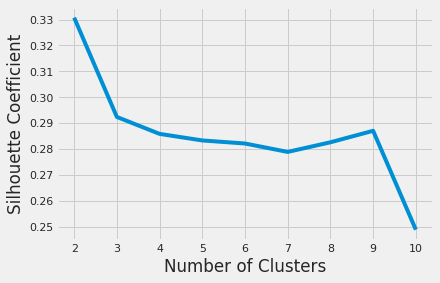

In [51]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [20]:
modelo_5_1 = KMeans(n_clusters=2).fit(scaled_features)

In [21]:
labels = modelo_5_1.predict(scaled_features)
df_dense['cluster_5_1'] = labels

/tmp/ipykernel_6088/481415363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dense['cluster_5_1'] = labels


<AxesSubplot:xlabel='Numero_de_transacciones', ylabel='promedio_por_transaccion'>

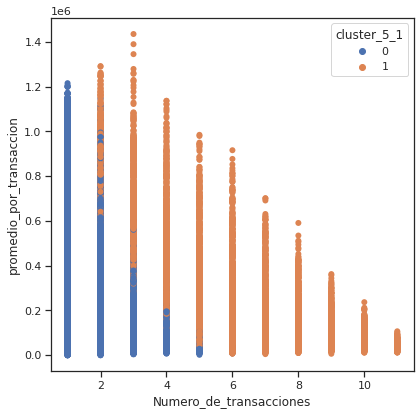

In [22]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Numero_de_transacciones', y="promedio_por_transaccion",
                hue="cluster_5_1",
                #palette="ch:r=-.2,d=.3_r",
                #hue_order=clarity_ranking,
                #sizes=(1, 8), 
                linewidth=0,
                data=df_dense[df_dense['cluster_5'] == 0], ax=ax)

In [24]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(style="ticks")

graph_columns = [ 'porcentaje_manana',
       'porcentaje_tarde', 'porcentaje_noche', 'porcDOMINGO', 'porcLUNES',
       'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES',
       'porcSABADO']
cluster = 'cluster_5'

rows_sz= 1
columns_sz=len(graph_columns)
fig, axes = plt.subplots(rows_sz,columns_sz,figsize=(500,100))

for idx,column in enumerate(graph_columns):

    sns.boxplot( ax=axes[idx],
    data=df,
    x=cluster, y=column)
    #id=idx
    #print(idx)
    axes[idx].set_title('Variable: {}'.format(column))

Error in callback <function flush_figures at 0x7f7b3d279160> (for post_execute):


KeyboardInterrupt: 